<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASES FOR DATA SCIENCE</h1> </center> <br>
<center> BC2: Predict Hotel Booking Cancellations 2021/2022 </center>

**GROUP AC:**    <br> 
- Beatriz Neto (20210608) <br>
- Rodrigo Joaquim (20211024) <br>
- Sara Silva (20210619)

**Table of Contents** <hr>
* [1. Import](#import)
    * [1.1. Import Libraries](#importlibraries)
    * [1.2. Import Dataset](#importdatasets)
* [2.Exploratory Analysis](#expoanal)
    * [2.1. Percentage of cancellations through the years](#%cancel)
    * [2.2. Percentage of cancellations for month and year](#%cancelmonth_years)
    * [2.3. Percentage of cancellations regarding Market Segment ](#%cancelmarket)
    * [2.4. Relationship between Market Segment and Deposit Type, in terms of booking cancellations ](#msdtbc)
    * [2.5. Country with highest amount of bookings](#highestbookings)
    * [2.6. Country with the highest booking cancellations](#countryhighestbook)
    * [2.7. World Map: quantity of customers per country origin](#worldmap)
    * [2.8. Family Bookings](#families)  
* [3. Data Preparation](#datapreparation)
    * [3.1.Descriptive Statistics ](#descripstat)
    * [3.2.Incoherence Checking](#incoherencechecking)
    * [3.3. Missing Values](#missval)
    * [3.4. Outlier Removal](#outlierremoval)
        * [3.4.1. Metric Features](#metricfeat)
           * [3.4.1.1. Manual](#manual)
           * [3.4.1.2. IQR](#iqr)
           * [3.4.1.3. Manual + IQR ](#manual+iqr)
           * [3.4.1.4. DBSCAN](#dbscan)
        * [3.4.2. Non-metric Features](#outliers_nonmetric)
* [4. Data Pre-Processing](#datapreprocessing)
   * [4.1. Feature Engeneering](#feateng)
* [5. Feature Selection](#featselect)
   * [5.1 Filter Methods](#filter)
      * [5.1.1 Variance Threshold](#variance)
      * [5.1.2. Spearman Correlation](#spearman)
      * [5.1.3. Information Gain](#infogain)
      * [5.1.4. Chi-Square](#chi-square)
   * [5.2 Wrapper Methods](#wrapper)
      * [5.2.1. Sequential Feature Selection](#ffs)
      * [5.2.2. RFE](#rfe)
   * [5.3. Embedded Methods](#embedded)
      * [5.3.1 Lasso Regression](#lasso)
      * [5.3.2. Ridge Regression](#ridge)
      * [5.3.3. Tree Based Classifier](#tree)
      * [5.3.4. AdaBoost Feature Importances](#adaboostfeat)
* [6. One Hot Encoder](#ohe)
* [7. Modelling](#model)
   * [7.1. Data Partition](#partition)
   * [7.2. Data Scaling](#scaling)
   * [7.3. Models](#models)
      * [7.3.1. Logistic Regression](#logistic)
      * [7.3.2. Naive Bayes](#naive)
      * [7.3.3. Decision Trees](#decision_trees)
      * [7.3.4. MLP Classifier (Neural Networks)](#neural)
      * [7.3.5.Adaboost](#adaboost)
      * [7.3.6. Gradient Boosting](#gradientboost)
      * [7.3.7.Random Forest](#randomforest)
      * [7.3.8.Extra Trees Classifier](#extratree)
      * [7.3.9. Bagging](#bagging)
      * [7.3.10. Stacking](#stacking)
* [7.4. Best Model](#best_model)

<hr>
<a class="anchor" id="import">
    
# 1. Imports
    
</a>

<a class="anchor" id="importlibraries">

## 1.1. Import Libraries

</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.cluster import DBSCAN
from collections import Counter

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, learning_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, mutual_info_classif, VarianceThreshold, SequentialFeatureSelector

from sklearn.linear_model import LogisticRegression, LassoCV , RidgeCV

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier

import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="importdatasets">

## 1.2. Import Dataset

</a>

In [1]:
path = 'https://raw.githubusercontent.com/beatriz-neto/Business-Cases-2021-2022/main/BC2_predicting_cancellations/'
h2 = pd.read_csv(path + 'H2.csv')
h2.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  2       1       0.0  ...  No Deposit                 6   
1                  4       2       0.0  ...  No Deposit                 9   
2                  4       1       0.0  ...  No Deposit                 9   
3                  4       2       0.0  ...  No Deposit                 9   
4                  2       2       0.0  ...  No Deposit                 9   

       Company DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0         NULL                 0    Transient   0.0                         0   
1         NULL                 0    Transient  76.5                         0   
2         NULL                 0    Transient  68.0                         0   
3         NULL                 0    Transient  76.5                         0   
4         NULL                 0    Transient  76.5                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-03  
1                       1          Canceled            2015-07-01  
2                       1          Canceled            2015-04-30  
3                       2          Canceled            2015-06-23  
4                       1          Canceled            2015-04-02  

[5 rows x 31 columns]

In [3]:
h2.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [4]:
h2.shape

(79330, 31)

<hr>
<a class="anchor" id="expoanal">
    
# 2. Explotory Analysis
    
</a>

<hr>
<a class="anchor" id="%cancel">
    
# 2.1 Percentage of cancellations through the years
    
</a>

In [5]:
# percentage of cancellations in each year
year = h2.groupby(['ArrivalDateYear', 'IsCanceled']).agg({'IsCanceled': 'count'})
total_year = h2.groupby(['ArrivalDateYear']).agg({'ArrivalDateYear': 'count'})

year['Percentage'] = np.round(100 * year['IsCanceled'] / total_year['ArrivalDateYear'],2)
year.drop('IsCanceled', axis=1, inplace=True)
year

Percentage
ArrivalDateYear IsCanceled            
2015            0                56.12
                1                43.88
2016            0                59.60
                1                40.40
2017            0                57.50
                1                42.50

In [6]:
#graph for percentage of cancellation in each year (2015-2017)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=h2['ArrivalDateYear'].unique(),
    y=[float(year.values[0]),float(year.values[2]),float(year.values[4])],
    name='% Not Cancelled',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=h2['ArrivalDateYear'].unique(),
    y=[float(year.values[1]),float(year.values[3]),float(year.values[5])],
    name='% Cancelled',
    marker_color='firebrick'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-30,title_text= 'Percentage of cancellations in each year (2015-2017)',
                 legend_title_text='IsCanceled')
fig.show()

<hr>
<a class="anchor" id="%cancelmonth_years">
    
# 2.2 Percentage of cancellations for month and year
    
</a>

In [7]:
#sorting by mounth
cat = ['January','February','March','April','May','June',
       'July','August','September','October','November','December']
h2['ArrivalDateMonth'] = pd.Categorical(h2['ArrivalDateMonth'], ordered=True, categories=cat)
df = h2.sort_values(['ArrivalDateMonth'])
df = df.reset_index()

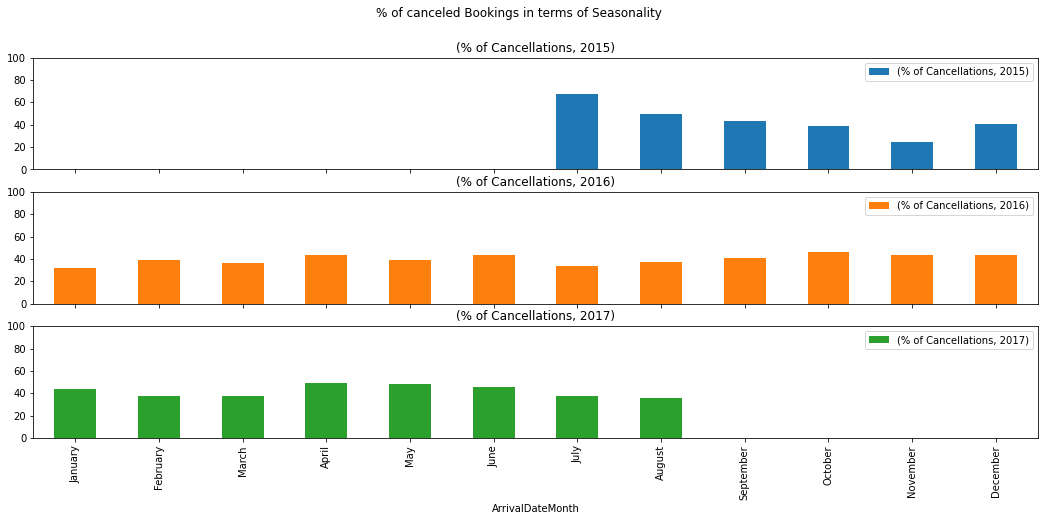

In [8]:
# percentage of cancellations for month and year (visualization for each year in subplots)
h2.sort_values(by='ArrivalDateMonth',inplace=True)
year_month = h2.loc[h2['IsCanceled']==1].groupby(['ArrivalDateYear', 'ArrivalDateMonth']).agg({'IsCanceled': 'count'})
total_year_month = h2.groupby(['ArrivalDateYear', 'ArrivalDateMonth']).agg({'ArrivalDateMonth': 'count'})

year_month['% of Cancellations'] = np.round(100 * year_month['IsCanceled'] / total_year_month['ArrivalDateMonth'],2)
year_month.drop('IsCanceled', axis=1, inplace=True)

ax = year_month.unstack(0).plot.bar(figsize=(18, 7), title='% of canceled Bookings in terms of Seasonality',
                           subplots=True, ylim=[0,100] )
#b[1].legend(loc=4)

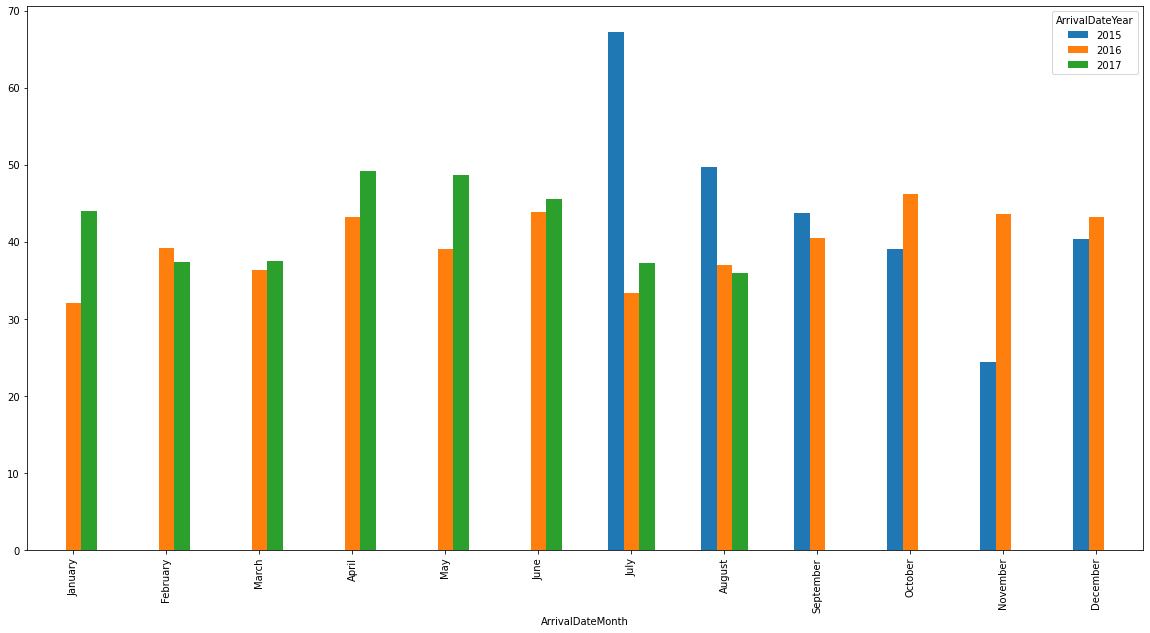

In [9]:
#alternative plot
year_month.reset_index().pivot('ArrivalDateMonth', 'ArrivalDateYear', '% of Cancellations').plot(kind='bar', figsize=(20,10))
plt.show()

<hr>
<a class="anchor" id="%cancelmarket">
    
# 2.3 Percentage of cancellations regarding Market Segment 
    
</a>

In [10]:
# % of cancellations for each market segment
market = h2.loc[h2['IsCanceled']==1].groupby(['MarketSegment']).agg(Amount=('MarketSegment','count'))
market['Percentage'] = np.round(100 * market['Amount'] / h2.loc[h2['IsCanceled']==1].shape[0],2)

#sorted the highest number of cancellations by percentage
market = market.sort_values(by='Percentage').reset_index()
market

MarketSegment  Amount  Percentage
0      Undefined       2        0.01
1       Aviation      52        0.16
2  Complementary      64        0.19
3      Corporate     641        1.94
4         Direct    1056        3.19
5  Offline TA/TO    7173       21.67
6         Groups    9623       29.07
7      Online TA   14491       43.78

In [11]:
#Graph sorted by the market segmentations with the highest percentage of cancellations
fig = px.histogram(market.sort_values(by='Percentage', ascending=False), x='MarketSegment', y='Percentage',color_discrete_sequence = ['darkred'])
fig.update_layout(title_text="Percentage of cancellations by market segment")
fig.show()

<hr>
<a class="anchor" id="msdtbc">
    
# 2.4. Relationship betweeen Market Segment and Deposit Type, in terms of booking cancellations
    
</a>

In [12]:
# dataframe with the canceled books
market = h2.loc[h2['IsCanceled']==1]

#Market segment regarding Deposit Type in terms of booking cancellations
market_deposit = market.groupby(['MarketSegment', 'DepositType']).agg(Amount=('DepositType','count'))
market_deposit

Amount
MarketSegment DepositType            
Aviation      No Deposit           52
Complementary No Deposit           64
Corporate     No Deposit          346
              Non Refund          294
              Refundable            1
Direct        No Deposit         1039
              Non Refund           16
              Refundable            1
Groups        No Deposit         1967
              Non Refund         7656
Offline TA/TO No Deposit         2319
              Non Refund         4854
Online TA     No Deposit        14455
              Non Refund           24
              Refundable           12
Undefined     No Deposit            2

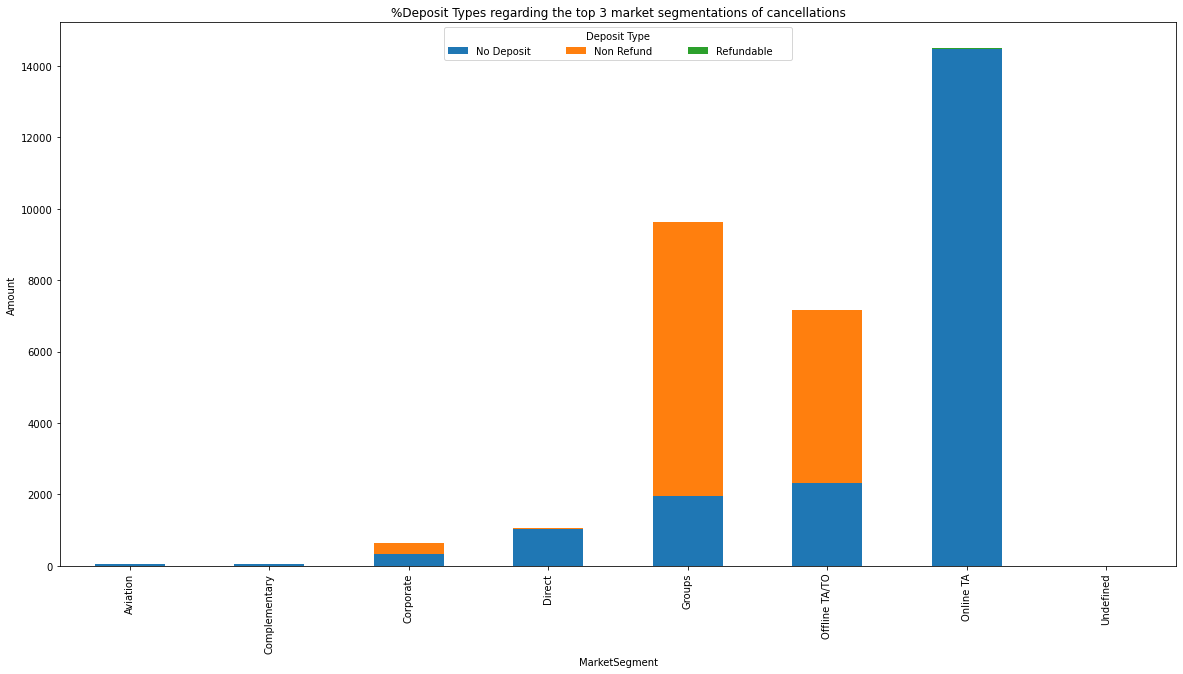

In [13]:
#Graph visualization
market_deposit.reset_index().pivot('MarketSegment', 'DepositType', 'Amount').plot(kind='bar', figsize=(20,10), 
                                                                                  title='%Deposit Types regarding the top 3 market segmentations of cancellations',
                                                                                  stacked=True).legend(loc='upper center', ncol=3, title="Deposit Type")
plt.ylabel("Amount")
plt.show()

<hr>
<a class="anchor" id="highestbookings">
    
# 2.5. Country with highest amount of bookings
</a>

In [14]:
#Countries with highest amount of bookings
country = h2.groupby(['Country']).agg({'Country':'count'})
country['Percentage'] = np.round(100 * country['Country'] / h2.shape[0],2)

#Sorted by percentage of bookings
country.sort_values(by='Percentage').tail(3)

Country  Percentage
Country                     
DEU         6084        7.67
FRA         8804       11.10
PRT        30960       39.03

Portugal guests account for the largest share of bookings, by 39.03%

####  - Market Segment regarding the country with the highest amount of bookings

In [15]:
#Dataframe with only Portuguese guests information
portugal = pd.DataFrame(h2.loc[(h2['Country'] == 'PRT')])

In [16]:
#Market Segmentation regarding portugual guests
country = portugal.groupby(['MarketSegment']).agg({'MarketSegment':'count'})
country['Percentage'] = np.round(100 * country['MarketSegment'] / portugal.shape[0],2)

# Sorted by percentage
country = country.sort_values(by='Percentage').tail(10)
country

MarketSegment  Percentage
MarketSegment                           
Undefined                  2        0.01
Aviation                 105        0.34
Complementary            511        1.65
Direct                  2066        6.67
Corporate               2267        7.32
Online TA               5495       17.75
Offline TA/TO           9506       30.70
Groups                 11008       35.56

In [17]:
country.drop('Percentage', axis=1, inplace=True)

#### - % of cancellations with the three highest portuguese market segmentations

In [18]:
#Dataframe for the 3 top portuguese market segmenations
portugal_best_market = pd.DataFrame(portugal.loc[(portugal['MarketSegment']=='Groups') | (portugal['MarketSegment']== 'Offline TA/TO') | (portugal['MarketSegment']== 'Online TA')])

In [19]:
# % of Cancelled bookings regarding the top portugues market segments
country_cancel=portugal_best_market.groupby(['MarketSegment', 'IsCanceled']).agg({'IsCanceled':'count'})
total = portugal_best_market.groupby(['MarketSegment']).agg({'MarketSegment':'count'})

country_cancel['Percentage'] = np.round(100 * country_cancel['IsCanceled'] / total['MarketSegment'],2)
country_cancel

IsCanceled  Percentage
MarketSegment IsCanceled                        
Groups        0                 1511       13.73
              1                 9497       86.27
Offline TA/TO 0                 2496       26.26
              1                 7010       73.74
Online TA     0                 3192       58.09
              1                 2303       41.91

Only OTAs have less than half of bookings cancelled. 

<hr>
<a class="anchor" id="countryhighestbook">
    
# 2.6.Country with the highest booking cancellations
</a>

In [20]:
country_cancel=h2.loc[h2['IsCanceled']==1].groupby(['Country']).agg(Amount=('Country', 'count')).sort_values(by='Amount').tail()
country_cancel['Percentage']=np.round(100 * country_cancel['Amount'] / h2.shape[0],2)
country_cancel

Amount  Percentage
Country                    
ITA        1253        1.58
ESP        1326        1.67
GBR        1562        1.97
FRA        1723        2.17
PRT       20081       25.31

Portuguese guests are the ones with highest cancellations

<hr>
<a class="anchor" id="worldmap">
    
## 2.7.  World Map: quantity of customers per country origin
</a>

In [21]:
# Amount of Bookings per country of origin
country_pop=pd.DataFrame(h2.groupby('Country').agg(Bookings=('Country','count'))).reset_index()
country_pop.head()

Country  Bookings
0     ABW         2
1     AGO       338
2     AIA         1
3     ALB         9
4     AND         2

In [22]:
# used another dataframe in order to create Continent variable
url = 'https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv?raw=true'
countries = pd.read_csv(url,index_col=0)
countries = countries[['alpha-3', 'region']]

countries_dict = pd.Series(countries['region'].values,index=countries['alpha-3']).to_dict()
country_pop['Continent'] = country_pop['Country'].map(countries_dict)

In [23]:
# assigne a continent manually 
# CN (China) - Asia; TMP (East Timor) - Asia
# ATA (Antartica) is an continent by itself and clearly an outlier so these 2 observations are going to be removed
country_pop['Continent'][country_pop['Country'] == 'CN'] = 'Asia'
country_pop['Continent'][country_pop['Country'] == 'TMP'] = 'Asia'

country_pop = country_pop[~(country_pop['Country'] == 'ATA')]

In [24]:
fig = px.scatter_geo(country_pop, locations="Country", color="Continent",
                     hover_name="Country", size="Bookings",
                     projection="natural earth")
fig.update_layout(title_text="World Map: quantity of customers per country origin")

fig.show()

In [25]:
fig=px.treemap(country_pop,path=[px.Constant('world'),'Continent','Country'], values='Bookings')
fig.update_traces(root_color="lightgrey")
fig.update_layout(title_text="Quantity of customers per country origin and continent")
fig.show()

<hr>
<a class="anchor" id="families">
    
## 2.8.  Family bookings
</a>

In [26]:
percentage_families = round(100 * h2[(h2['Adults'] != 0) & ((h2['Children'] != 0) | (h2['Children'] != 0))].shape[0] / h2.shape[0],2)

print(str(percentage_families) + '% of bookings are for families.')

6.16% of bookings are for families.


#### - % of Bookings regarding the relationship between Adults,children and babies

In [27]:
people = h2.groupby(['Adults', 'Children', 'Babies']).agg({'Adults':'count'})
people['Percentage'] = np.round(100 * people['Adults'] / h2.shape[0],2)
people.drop('Adults', axis = 1, inplace = True)

#Sorting by the highest percentages of bookings made with these three features combined
people.sort_values(by='Percentage').tail()

Percentage
Adults Children Babies            
2      2.0      0             2.10
       1.0      0             3.36
3      0.0      0             5.85
1      0.0      0            19.62
2      0.0      0            67.47

Around 68% of the guests book for 2 adults and 20% for one

#### - % of Bookings Cancelled regarding the relationship between Adults,children and babies

In [28]:
people = h2.loc[h2['IsCanceled']==1].groupby(['Adults', 'Children', 'Babies']).agg(Amount=('IsCanceled','count'))
people['Percentage'] = np.round(100 * people['Amount'] / h2.shape[0],2)

people.sort_values(by='Percentage').tail()

Amount  Percentage
Adults Children Babies                    
2      2.0      0          663        0.84
       1.0      0          931        1.17
3      0.0      0         1747        2.20
1      0.0      0         5372        6.77
2      0.0      0        24087       30.36

Guests that include children do less cancellations compared when  go only adults

<hr>
<a class="anchor" id="datapreparation">
    
# 3. Data Preparation
    
</a>

### Explore Datatypes

In [29]:
h2.dtypes

IsCanceled                        int64
LeadTime                          int64
ArrivalDateYear                   int64
ArrivalDateMonth               category
ArrivalDateWeekNumber             int64
ArrivalDateDayOfMonth             int64
StaysInWeekendNights              int64
StaysInWeekNights                 int64
Adults                            int64
Children                        float64
Babies                            int64
Meal                             object
Country                          object
MarketSegment                    object
DistributionChannel              object
IsRepeatedGuest                   int64
PreviousCancellations             int64
PreviousBookingsNotCanceled       int64
ReservedRoomType                 object
AssignedRoomType                 object
BookingChanges                    int64
DepositType                      object
Agent                            object
Company                          object
DaysInWaitingList                 int64


In [30]:
# change wrong datatypes
h2['ADR'] = h2['ADR'].astype('int64')
h2['IsRepeatedGuest'] = h2['IsRepeatedGuest'].astype('category')
h2['ReservationStatusDate'] = pd.to_datetime(h2['ReservationStatusDate'], format='%Y/%m/%d')

### Defining Features

In [31]:
non_metric_features = ['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 
                       'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 'Company', 'CustomerType', 
                      'ReservationStatus', 'ReservationStatusDate', 'IsRepeatedGuest']

_list = non_metric_features.copy()
_list.append('IsCanceled')

metric_features = list(h2.drop(_list, axis = 1).columns.values)

### Check & Drop Duplicates

In [32]:
# check the number of duplicated rows
h2.duplicated().sum() 

25910

In [33]:
# drop duplicated rows
h2.drop_duplicates(inplace=True)

In [34]:
# number of rows left in the dataset
h2.shape[0]

53420

<a class="anchor" id="descripstat">

## 3.1. Descriptive Statistics

</a>

In [35]:
h2[metric_features].describe().T

count         mean        std     min     25%  \
LeadTime                     53420.0    77.678398  82.110711     0.0    14.0   
ArrivalDateYear              53420.0  2016.254025   0.659313  2015.0  2016.0   
ArrivalDateWeekNumber        53420.0    26.639068  13.585441     1.0    16.0   
ArrivalDateDayOfMonth        53420.0    15.754811   8.801722     1.0     8.0   
StaysInWeekendNights         53420.0     0.872108   0.913756     0.0     0.0   
StaysInWeekNights            53420.0     2.274298   1.618468     0.0     1.0   
Adults                       53420.0     1.876395   0.544245     0.0     2.0   
Children                     53416.0     0.131814   0.442117     0.0     0.0   
Babies                       53420.0     0.007338   0.102672     0.0     0.0   
PreviousCancellations        53420.0     0.035773   0.372812     0.0     0.0   
PreviousBookingsNotCanceled  53420.0     0.191520   2.038949     0.0     0.0   
BookingChanges               53420.0     0.246350   0.704089     0.0     0.0   
DaysInWaitingList            53420.0     1.020386  11.902588     0.0     0.0   
ADR                          53420.0   110.737252  48.061282     0.0    84.0   
RequiredCarParkingSpaces     53420.0     0.035623   0.186258     0.0     0.0   
TotalOfSpecialRequests       53420.0     0.711007   0.833558     0.0     0.0   

                                50%     75%     max  
LeadTime                       50.0   118.0   629.0  
ArrivalDateYear              2016.0  2017.0  2017.0  
ArrivalDateWeekNumber          27.0    37.0    53.0  
ArrivalDateDayOfMonth          16.0    23.0    31.0  
StaysInWeekendNights            1.0     2.0    16.0  
StaysInWeekNights               2.0     3.0    41.0  
Adults                          2.0     2.0     4.0  
Children                        0.0     0.0     3.0  
Babies                          0.0     0.0    10.0  
PreviousCancellations           0.0     0.0    21.0  
PreviousBookingsNotCanceled     0.0     0.0    72.0  
BookingChanges                  0.0     0.0    21.0  
DaysInWaitingList               0.0     0.0   391.0  
ADR                           105.0   134.0  5400.0  
RequiredCarParkingSpaces        0.0     0.0     3.0  
TotalOfSpecialRequests          1.0     1.0     5.0

<a class="anchor" id="#incoherencechecking">

## 3.2. Incoherence Checking

</a>

In [36]:
h2_ic = h2.copy()

# can't have bookings with babies without adults
h2_ic[(h2_ic['Adults'] == 0) & (h2_ic['Babies'] != 0)]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
50730           0        14             2016             June   
41315           1        22             2015         December   
6090            0         6             2015         December   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
50730                     24                      9                     0   
41315                     50                      9                     1   
6090                      51                     18                     0   

       StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
50730                  3       0       2.0  ...  No Deposit                 9   
41315                  4       0       2.0  ...  No Deposit                14   
6090                   1       0       2.0  ...  No Deposit                 9   

           Company DaysInWaitingList     CustomerType  ADR  \
50730         NULL                 0        Transient  116   
41315         NULL                 0        Transient   80   
6090          NULL                 0  Transient-Party   77   

       RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
50730                         0                       2         Check-Out   
41315                         0                       1           No-Show   
6090                          0                       2         Check-Out   

      ReservationStatusDate  
50730            2016-06-12  
41315            2015-12-09  
6090             2015-12-19  

[3 rows x 31 columns]

In [37]:
# removing these 3 observations
h2_ic = h2_ic[~((h2_ic['Adults'] == 0) & (h2_ic['Babies'] != 0))]

In [38]:
# the case of bookings with children without adults is more likely to happen in case of 'teens' with their parents permition
h2_ic[(h2_ic['Adults'] == 0) & (h2_ic['Children'] != 0)]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
6680            1        16             2016          January   
6628            1        11             2016          January   
6428            0        30             2016          January   
6595            0        40             2016          January   
6586            0        40             2016          January   
...           ...       ...              ...              ...   
21367           1         9             2016         December   
63562           0       104             2016         December   
63552           0       104             2016         December   
63575           0       247             2016         December   
21873           1       251             2016         December   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
6680                       4                     18                     1   
6628                       3                     15                     2   
6428                       2                      3                     1   
6595                       3                     14                     0   
6586                       3                     14                     0   
...                      ...                    ...                   ...   
21367                     50                     10                     0   
63562                     53                     25                     2   
63552                     53                     25                     2   
63575                     52                     24                     2   
21873                     53                     28                     2   

       StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
6680                   3       0       2.0  ...  No Deposit                 9   
6628                   2       0       2.0  ...  No Deposit                 9   
6428                   0       0       2.0  ...  No Deposit                 9   
6595                   3       0       2.0  ...  No Deposit                 9   
6586                   3       0       2.0  ...  No Deposit                 9   
...                  ...     ...       ...  ...              ...          ...   
21367                  1       0       2.0  ...  No Deposit              NULL   
63562                  1       0       2.0  ...  No Deposit                 9   
63552                  1       0       2.0  ...  No Deposit                 9   
63575                  3       0       2.0  ...  No Deposit                 9   
21873                  9       0       2.0  ...  No Deposit                 9   

           Company DaysInWaitingList     CustomerType ADR  \
6680          NULL                 0  Transient-Party  77   
6628          NULL                 0  Transient-Party  77   
6428          NULL                 0  Transient-Party  15   
6595          NULL                 0        Transient   6   
6586          NULL                 0        Transient   6   
...            ...               ...              ...  ..   
21367           45                 0  Transient-Party   0   
63562         NULL                 0        Transient  91   
63552         NULL                 0        Transient  91   
63575         NULL                 0        Transient  67   
21873         NULL                 0        Transient  74   

       RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
6680                          0                       0          Canceled   
6628                          0                       0          Canceled   
6428                          0                       1         Check-Out   
6595                          0                       1         Check-Out   
6586                          0                       1         Check-Out   
...                         ...                     ...               ...   
21367                         0                       1 

<a class="anchor" id="missval">

## 3.3. Missing Values

</a>

In [39]:
h2_mv = h2_ic.copy()

In [40]:
## Count missing values
h2_mv.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
Meal                           0
Country                        6
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

In [41]:
# Children - imput value 0 where are NaN's
h2_mv['Children'].fillna(0, inplace=True)

h2_mv['Children'] = h2_mv['Children'].astype('int64')

In [42]:
# Country - remove records where are NaN's
h2_mv = h2_mv[~h2_mv['Country'].isna()]

In [43]:
print('Percentage of data kept after removing observations:', np.round(h2_mv.shape[0] / h2.shape[0], 4))

Percentage of data kept after removing observations: 0.9998


<hr>
<a class="anchor" id="outlierremoval">
    
# 3.4. Outlier Removal
    
</a>

<hr>
<a class="anchor" id="metricfeat">
    
## 3.4.1. Metric Features
    
</a>

### Data Visualization

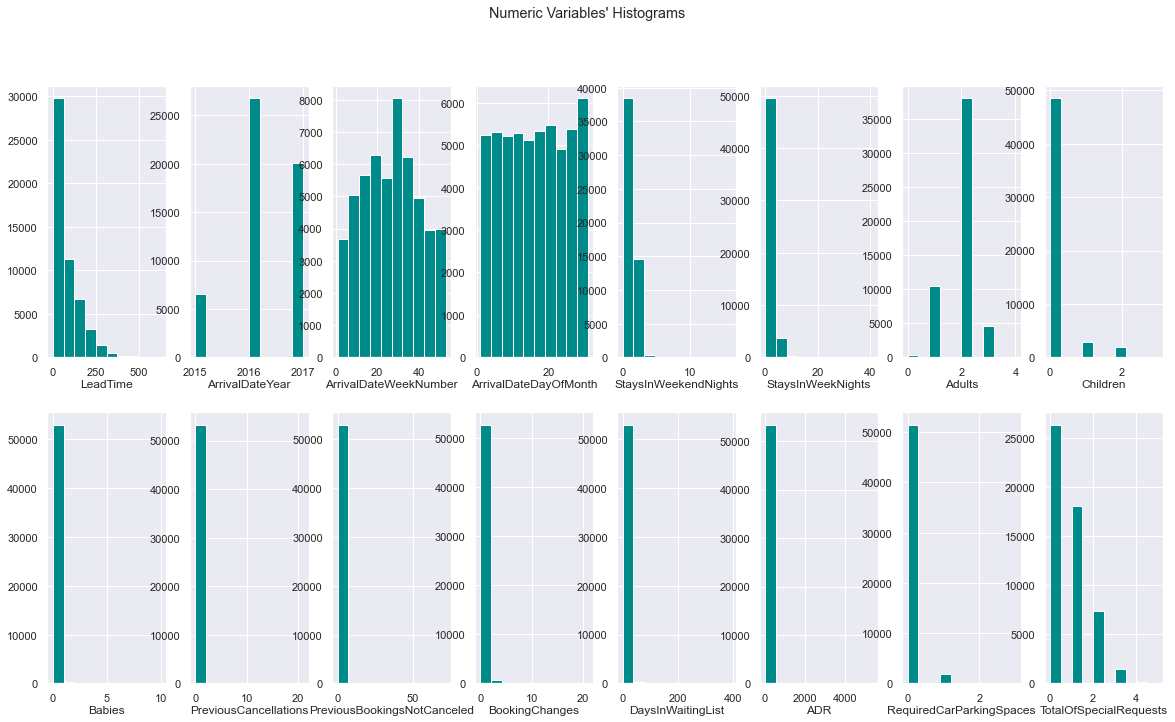

In [44]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(h2_mv[metric_features].columns) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), h2_mv[metric_features].columns):
    ax.hist(h2_mv[feat], color = 'darkcyan')
    ax.set_title(feat, y=-0.13)
    

title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

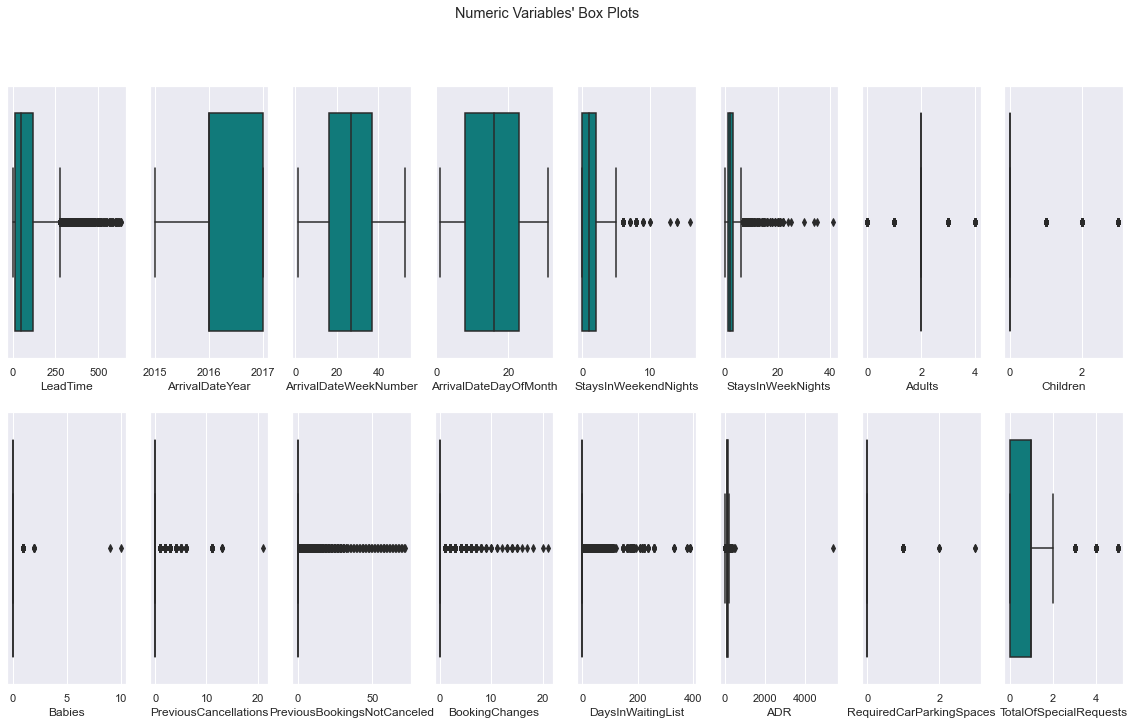

In [45]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(h2_mv[metric_features].columns) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), h2_mv[metric_features].columns): 
    sns.boxplot(h2_mv[feat], ax=ax, color = 'darkcyan')
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="manual">
    
## 3.4.1.1. Manual
    
</a>

In [46]:
h2_manual = h2_mv.copy()

In [47]:
# By analyzing the above visualizations, establish filters for each variable

filters = (
    (h2_manual['LeadTime'] <= 500)
    &
    (h2_manual['StaysInWeekendNights'] <= 8)
    &
    (h2_manual['StaysInWeekNights'] <= 18)
    &
    (h2_manual['Babies'] <= 5) 
    &
    (h2_manual['PreviousCancellations'] <= 10) 
    &
    (h2_manual['PreviousBookingsNotCanceled'] <= 10)
    &
    (h2_manual['BookingChanges'] <= 8)
    &
    (h2_manual['DaysInWaitingList'] <= 100)
    &
    (h2_manual['ADR'] <= 2000)
    &
    (h2_manual['RequiredCarParkingSpaces'] <= 2)
)

h2_manual = h2_manual[filters]

In [48]:
print('Percentage of data kept after removing outliers:', np.round(h2_manual.shape[0] / h2.shape[0], 4))

Percentage of data kept after removing outliers: 0.9892


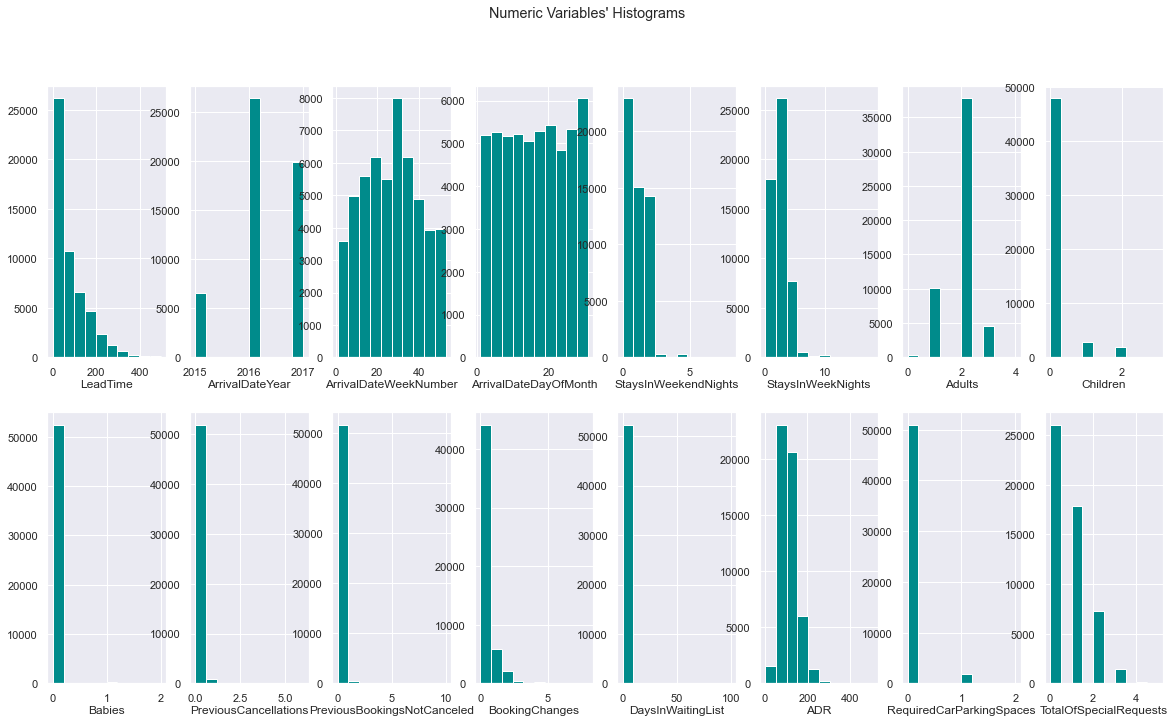

In [49]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(h2_manual[metric_features].columns) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), h2_manual[metric_features].columns):
    ax.hist(h2_manual[feat], color = 'darkcyan')
    ax.set_title(feat, y=-0.13)
    

title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="iqr">
    
## 3.4.1.2. IQR
    
</a>

In [50]:
h2_iqr = h2_mv.copy()

In [51]:
q25 = h2_iqr.quantile(.25)
q75 = h2_iqr.quantile(.75)
iqr = (q75 - q25)
# Establishing an upper and a lower limit, that will function as outliers borders

upper_lim = q75 + 7 * iqr
lower_lim = q25 - 7 * iqr

filters2 = []
for feat in h2_iqr[metric_features].columns:
    llim = lower_lim[feat]
    ulim = upper_lim[feat]
    filters2.append(h2_iqr[feat].between(llim, ulim, inclusive=True))

filters2 = pd.Series(np.all(filters2, 0), index=h2_iqr.index)

h2_iqr = h2_iqr[filters2]


print('Percentage of data kept after removing outliers:', np.round(h2_iqr.shape[0] / h2.shape[0], 4))

Percentage of data kept after removing outliers: 0.5141


<hr>
<a class="anchor" id="manual+iqr">
    
## 3.4.1.3. Manual & IQR
    
</a>

In [52]:
h2_both = h2_mv[(filters | filters2)]
print('Percentage of data kept after removing outliers:', np.round(h2_both.shape[0] / h2.shape[0], 4))

Percentage of data kept after removing outliers: 0.9898


<hr>
<a class="anchor" id="dbscan">
    
## 3.4.1.4. DBSCAN
    
</a>

In [53]:
h2_dbscan = h2_mv.copy()

In [54]:
# Scaled the data with MinMaxScaler() 
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(h2_dbscan[metric_features])

In [55]:
h2_dbscan[metric_features] = pd.DataFrame(scaled_feat, columns = h2_dbscan[metric_features].columns, index=h2_dbscan[metric_features].index)

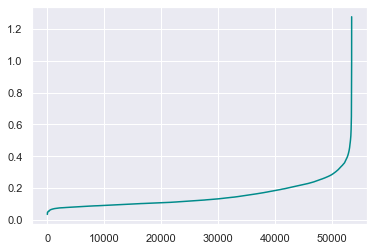

In [56]:
# Create the K-distance graph to find out
# the rigth epsilon value to work with
neigh = NearestNeighbors(n_neighbors = (2 * len(h2_dbscan[metric_features].columns)) - 1)
neigh_fit = neigh.fit(h2_dbscan[metric_features])
distances, indices = neigh_fit.kneighbors(h2_dbscan[metric_features])
distances = np.sort(distances, axis=0)
distances = distances[:,-1]
plt.plot(distances, color = 'darkcyan')
plt.show()

In [57]:
# Perform DBSCAN clustering, after analysing the previous graphs
# with an epsilon of 0.34 (elbow) , and a min_samples equivalent to double 
# of the total number of metric features that we have
dbscan = DBSCAN(eps=0.34, min_samples = 2 * len(h2_dbscan[metric_features].columns), n_jobs = -1)
dbscan_labels = dbscan.fit_predict(h2_dbscan[metric_features])

Counter(dbscan_labels)

Counter({0: 19886, 1: 26471, -1: 557, 2: 6497})

In [58]:
h2_dbscan[metric_features] = pd.DataFrame(scaler.inverse_transform(h2_dbscan[metric_features]), columns = h2_dbscan[metric_features].columns, index = h2_dbscan[metric_features].index)

In [59]:
h2_dbscan = pd.concat([h2_dbscan, pd.Series(dbscan_labels, name = 'dbscan_labels', index = h2_dbscan.index)], axis = 1)

In [60]:
# Dataframe without outliers 
h2_dbscan = h2_dbscan[dbscan_labels!=-1]

In [61]:
print('Percentage of train data kept after removing outliers:', np.round(h2_dbscan.shape[0] / h2.shape[0], 4))

Percentage of train data kept after removing outliers: 0.9894


In [62]:
h2_dbscan.drop('dbscan_labels', axis=1, inplace= True)

In [63]:
# change floats to int
float_col = h2_dbscan.select_dtypes(include=['float64']) # This will select float columns only

for col in float_col.columns.to_list():
    h2_dbscan[col] = h2_dbscan[col].apply('int64')

<hr>
<a class="anchor" id="outliers_nonmetric">
    
## 3.4.2. Non Metric Features
    
</a>

In [64]:
h2_cat = h2_dbscan.copy()

In [65]:
h2_cat[non_metric_features].columns

Index(['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType',
       'DepositType', 'Agent', 'Company', 'CustomerType', 'ReservationStatus',
       'ReservationStatusDate', 'IsRepeatedGuest'],
      dtype='object')

### ArrivalDateMonth

In [66]:
# doesn't seem to exist outliers
h2_cat['ArrivalDateMonth'].value_counts()

August       6502
July         5675
May          5383
April        5039
June         4978
March        4817
September    4197
October      4163
February     3561
December     2959
November     2923
January      2657
Name: ArrivalDateMonth, dtype: int64

### Meal

In [67]:
h2_cat['Meal'].unique()

array(['BB       ', 'SC       ', 'HB       ', 'FB       '], dtype=object)

In [68]:
# remove the spaces in values of the column
h2_cat['Meal'] = h2_cat['Meal'].str.replace(' ', '')

In [69]:
# FB seems to be an outlier
h2_cat['Meal'].value_counts()

BB    40736
SC     9363
HB     2744
FB       11
Name: Meal, dtype: int64

In [70]:
# Remove observations whre Meal is FB
h2_cat = h2_cat[h2_cat['Meal'] != 'FB']

In [71]:
print('Percentage of train data kept after removing outliers:', np.round(h2_cat.shape[0] / h2.shape[0], 4))

Percentage of train data kept after removing outliers: 0.9892


### Country

<AxesSubplot:xlabel='Country', ylabel='Count'>

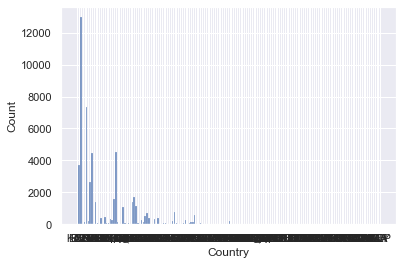

In [72]:
sns.histplot(data=h2_cat, x="Country", shrink=.8)

In [73]:
h2_cat['Country'].value_counts()

PRT    12975
FRA     7365
GBR     4505
DEU     4443
ESP     3716
       ...  
NIC        1
JAM        1
SYC        1
SDN        1
GLP        1
Name: Country, Length: 166, dtype: int64

### MarketSegment

In [74]:
# Undefined seems to be an outlier
h2_cat['MarketSegment'].value_counts()

Online TA        34687
Offline TA/TO     7243
Direct            5448
Groups            2584
Corporate         2164
Complementary      488
Aviation           227
Undefined            2
Name: MarketSegment, dtype: int64

In [75]:
# Remove observations where MarketSegment is Undefined
h2_cat = h2_cat[h2_cat['MarketSegment'] != 'Undefined']

In [76]:
print('Percentage of train data kept after removing outliers:', np.round(h2_cat.shape[0] / h2.shape[0], 4))

Percentage of train data kept after removing outliers: 0.9892


### DistributionChannel

In [77]:
# Undefined seems to be an outlier
h2_cat['DistributionChannel'].value_counts()

TA/TO        44164
Direct        5948
Corporate     2546
GDS            181
Undefined        2
Name: DistributionChannel, dtype: int64

In [78]:
# Remove observations where DistributionChannel is Undefined
h2_cat = h2_cat[h2_cat['DistributionChannel'] != 'Undefined']

In [79]:
print('Percentage of train data kept after removing outliers:', np.round(h2_cat.shape[0] / h2.shape[0], 4))

Percentage of train data kept after removing outliers: 0.9891


### ReservedRoomType

In [80]:
h2_cat['ReservedRoomType'].unique()

array(['A               ', 'D               ', 'B               ',
       'F               ', 'E               ', 'G               ',
       'C               ', 'P               '], dtype=object)

In [81]:
# remove the spaces in values of the column
h2_cat['ReservedRoomType'] = h2_cat['ReservedRoomType'].str.replace(' ', '')

In [82]:
# C and P seems to be outliers
h2_cat['ReservedRoomType'].value_counts()

A    37683
D    10720
F     1701
E     1433
B      869
G      418
C       14
P        1
Name: ReservedRoomType, dtype: int64

In [83]:
# Remove observations where ReservedRoomType is C or P
h2_cat = h2_cat[(h2_cat['ReservedRoomType'] != 'C') & (h2_cat['ReservedRoomType'] != 'P')]

In [84]:
print('Percentage of train data kept after removing outliers:', np.round(h2_cat.shape[0] / h2.shape[0], 4))

Percentage of train data kept after removing outliers: 0.9888


### AssignedRoomType

In [85]:
h2_cat['AssignedRoomType'].unique()

array(['A               ', 'B               ', 'D               ',
       'F               ', 'E               ', 'G               ',
       'K               ', 'C               '], dtype=object)

In [86]:
# remove the spaces in values of the column
h2_cat['AssignedRoomType'] = h2_cat['AssignedRoomType'].str.replace(' ', '')

In [87]:
# doesn't seem to have outliers
h2_cat['AssignedRoomType'].value_counts()

A    33178
D    13138
E     2011
F     1914
B     1541
G      632
K      260
C      150
Name: AssignedRoomType, dtype: int64

### DepositType

In [88]:
h2_cat['DepositType'].unique()

array(['No Deposit     ', 'Non Refund     ', 'Refundable     '],
      dtype=object)

In [89]:
# remove the spaces in values of the column
h2_cat['DepositType'] = h2_cat['DepositType'].str.replace(' ', '')

In [90]:
# Refundable seems to be an outlier
h2_cat['DepositType'].value_counts()

NoDeposit     51999
NonRefund       810
Refundable       15
Name: DepositType, dtype: int64

In [91]:
# Remove observations where DepositType is Refundable
h2_cat = h2_cat[h2_cat['DepositType'] != 'Refundable']

In [92]:
print('Percentage of train data kept after removing outliers:', np.round(h2_cat.shape[0] / h2.shape[0], 4))

Percentage of train data kept after removing outliers: 0.9886


### Agent

<AxesSubplot:xlabel='Agent', ylabel='Count'>

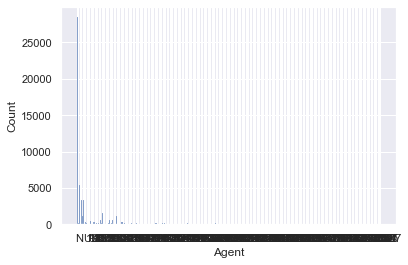

In [93]:
sns.histplot(data=h2_cat, x="Agent", shrink=.8)

In [94]:
h2_cat['Agent'].value_counts()

          9    28481
       NULL     5436
         14     3283
          7     3277
         28     1501
               ...  
        278        1
        247        1
        476        1
        270        1
        397        1
Name: Agent, Length: 224, dtype: int64

In [95]:
# drop Agent column
h2_cat.drop('Agent', axis=1, inplace=True)
non_metric_features.remove('Agent')

### Company

In [96]:
h2_cat['Company'].value_counts()

       NULL    50113
         40      804
         45      221
        153      206
        219      125
               ...  
        486        1
        229        1
        448        1
        494        1
        395        1
Name: Company, Length: 205, dtype: int64

### CustomerType

In [97]:
# doesn't seem to have outliers
h2_cat['CustomerType'].value_counts()

Transient          44156
Transient-Party     6931
Contract            1455
Group                267
Name: CustomerType, dtype: int64

### ReservationStatus

In [98]:
# doesn't seem to have outliers
h2_cat['ReservationStatus'].value_counts()

Check-Out    36923
Canceled     15142
No-Show        744
Name: ReservationStatus, dtype: int64

### IsRepeatedGuest

In [99]:
# doesn't seem to have outliers
h2_cat['IsRepeatedGuest'].value_counts()

0    51202
1     1607
Name: IsRepeatedGuest, dtype: int64

<hr>
<a class="anchor" id="datapreprocessing">
    
# 4. Data Pre-Processing
    
</a>

In [100]:
h2 = h2_cat.copy()

<hr>
<a class="anchor" id="feateng">
    
## 4.1. Feature Engineering
    
</a>

In [101]:
# create Continent variable
url = 'https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv?raw=true'
countries = pd.read_csv(url,index_col=0)
countries = countries[['alpha-3', 'region']]

countries_dict = pd.Series(countries['region'].values,index=countries['alpha-3']).to_dict()
h2['Continent'] = h2['Country'].map(countries_dict)

In [102]:
# assigne a continent manually 
# CN (China) - Asia; TMP (East Timor) - Asia
# ATA (Antartica) is an continent by itself and clearly an outlier so these 2 observations are going to be removed
h2['Continent'][h2['Country'] == 'CN'] = 'Asia'
h2['Continent'][h2['Country'] == 'TMP'] = 'Asia'

h2 = h2[~(h2['Country'] == 'ATA')]

h2.drop('Country', axis=1, inplace=True)

non_metric_features.remove('Country')
non_metric_features.append('Continent')

In [103]:
# create a binary variable that takes the value 1 when the customer paid directly to the hotel and 0 when was paid by a company
def payment(row):
    if row['Company'] == 'NULL':
        return 1
    else:
        return 0

h2['DirectPayment'] = h2.apply(lambda row: payment(row), axis = 1)

h2.drop('Company', axis=1, inplace=True)

non_metric_features.remove('Company')
non_metric_features.append('DirectPayment')

In [104]:
# change ArrivalDateDayMonth varivale

month = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9,
        'October':10, 'November':11, 'December':12}

h2['ArrivalDateMonth'] = h2['ArrivalDateMonth'].map(month)

non_metric_features.remove('ArrivalDateMonth')
metric_features.append('ArrivalDateMonth')

In [105]:
# create Length of stay (in days)
h2['arrival_date'] = pd.to_datetime(h2['ArrivalDateYear'].astype(str)+h2['ArrivalDateMonth'].astype(str)+h2['ArrivalDateDayOfMonth'].astype(str),format="%Y%m%d")

def lenght_of_stay(row):
    if row['ReservationStatus'] == 'Check-Out':
        return (row['ReservationStatusDate'] - row['arrival_date']) / np.timedelta64(1, 'D')
    else:
        return 0

h2['LengthStay'] = (h2.apply(lambda row: lenght_of_stay(row), axis = 1)).astype('int64')

h2.drop('arrival_date', axis=1, inplace=True)

metric_features.append('LengthStay')

In [106]:
# change ReservationStatusDate

h2['ReservationStatusDateYear'] = h2['ReservationStatusDate'].dt.year
h2['ReservationStatusDateMonth'] = h2['ReservationStatusDate'].dt.month
h2['ReservationStatusDateDay'] = h2['ReservationStatusDate'].dt.day

h2.drop('ReservationStatusDate', axis = 1, inplace = True)

non_metric_features.remove('ReservationStatusDate')
metric_features.extend(['ReservationStatusDateYear', 'ReservationStatusDateMonth', 'ReservationStatusDateDay'])

In [107]:
# create Season variable

def season(row):
    if row['ArrivalDateMonth'] in [1, 2] \
    or (row['ArrivalDateMonth'] == 12 and row['ArrivalDateDayOfMonth'] >= 21) \
    or (row['ArrivalDateMonth'] == 3 and row['ArrivalDateDayOfMonth'] < 20):
        return 'Winter'
    elif row['ArrivalDateMonth'] in [4, 5] \
    or (row['ArrivalDateMonth'] == 3 and row['ArrivalDateDayOfMonth'] >= 20) \
    or (row['ArrivalDateMonth'] == 6 and row['ArrivalDateDayOfMonth'] < 21):
        return 'Spring'
    elif row['ArrivalDateMonth'] in [7, 8] \
    or (row['ArrivalDateMonth'] == 6 and row['ArrivalDateDayOfMonth'] >= 21) \
    or (row['ArrivalDateMonth'] == 9 and row['ArrivalDateDayOfMonth'] < 22):
        return 'Summer'
    elif row['ArrivalDateMonth'] in [10, 11] \
    or (row['ArrivalDateMonth'] == 9 and row['ArrivalDateDayOfMonth'] >= 22) \
    or (row['ArrivalDateMonth'] == 12 and row['ArrivalDateDayOfMonth'] < 21):
        return 'Autumn'
    
h2['ArrivalDateSeason'] = h2.apply(lambda row: season(row), axis = 1)

non_metric_features.append('ArrivalDateSeason')

In [108]:
# create cancelation ratio variable

h2['CancellationRatio'] = 100 * h2['PreviousCancellations'] / (h2['PreviousCancellations'] + h2['PreviousBookingsNotCanceled'])

# when 0/0 it returns NaN, so we need to replace the NaN by 0
h2['CancellationRatio'].fillna(0, inplace=True)

h2['CancellationRatio'] = np.round(h2['CancellationRatio'], 2)

# drop PreviousCancellations and PreviousBookingsNotCanceled columns
h2.drop(['PreviousBookingsNotCanceled', 'PreviousCancellations'], axis = 1, inplace = True)

metric_features.append('CancellationRatio')
metric_features.remove('PreviousBookingsNotCanceled')
metric_features.remove('PreviousCancellations')

In [109]:
h2.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'DaysInWaitingList', 'CustomerType',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ReservationStatus', 'Continent', 'DirectPayment', 'LengthStay',
       'ReservationStatusDateYear', 'ReservationStatusDateMonth',
       'ReservationStatusDateDay', 'ArrivalDateSeason', 'CancellationRatio'],
      dtype='object')

<hr>
<a class="anchor" id="featselect">
    
# 5. Feature Selection
    
</a>

In [110]:
# sort the dataframe by arrival year, month and day

h2.sort_values(by = ['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth'], inplace=True)

### Data Partition

In [111]:
# Define X matrix and target (y)
X = h2.drop('IsCanceled', axis = 1)
y = h2['IsCanceled']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 93,shuffle = False)

In [112]:
# Define a new object named a X_train_met where only the metric variables are mantained, 
# a object named as X_train_nonmet with all the non metric features
# The same for the test data

X_train_met = X_train[metric_features]
X_val_met = X_val[metric_features]

X_train_nonmet = X_train[non_metric_features]
X_val_nonmet = X_val[non_metric_features]

### Data Scaling

In [113]:
# scaling train data

scaler = MinMaxScaler()
X_train_met_scaled = scaler.fit_transform(X_train_met)   # this will return an array

# Convert the array to a pandas dataframe
X_train_met_scaled = pd.DataFrame(X_train_met_scaled, columns = X_train_met.columns).set_index(X_train.index)

In [114]:
# scaling val data

X_val_met_scaled = scaler.fit_transform(X_val_met)

X_val_met_scaled = pd.DataFrame(X_val_met_scaled, columns = X_val_met.columns).set_index(X_val.index)

<hr>
<a class="anchor" id="filter">
    
## 5.1. Filter methods
    
</a>

<hr>
<a class="anchor" id="variance">
    
### 5.1.1. Variance Threshold
    
</a>

In [115]:
selector = VarianceThreshold(threshold=0.01) # Variance threshold 
sel = selector.fit(X_train_met_scaled)
sel_index = sel.get_support()
X_train_met_norm_vt = X_train_met_scaled.iloc[:, sel_index]
print(X_train_met_norm_vt.columns)

Index(['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'Adults', 'Children',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ArrivalDateMonth', 'LengthStay', 'ReservationStatusDateYear',
       'ReservationStatusDateMonth', 'ReservationStatusDateDay',
       'CancellationRatio'],
      dtype='object')


<hr>
<a class="anchor" id="spearman">
    
### 5.1.2. Spearman Correlation
    
</a>

In [116]:
# We are going to check now the spearman correlation between the variables. 
# First we need to create a new dataframe with all the training data, but containing 
# also the dependent variable, so we can check if any of the independent variables are 
# correlated with the target

all_met = X_train_met.join(y)
all_met.head()

LeadTime  ArrivalDateYear  ArrivalDateWeekNumber  \
3            92             2015                     27   
2            65             2015                     27   
1            88             2015                     27   
34939       181             2015                     27   
34940       181             2015                     27   

       ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  \
3                          1                     2                  4       2   
2                          1                     0                  4       1   
1                          1                     0                  4       2   
34939                      1                     1                  4       2   
34940                      1                     0                  2       2   

       Children  Babies  BookingChanges  ...  ADR  RequiredCarParkingSpaces  \
3             0       0               0  ...   76                         0   
2             0       0               0  ...   68                         0   
1             0       0               0  ...   76                         0   
34939         0       0               0  ...   76                         0   
34940         0       0               0  ...   76                         0   

       TotalOfSpecialRequests  ArrivalDateMonth LengthStay  \
3                           2                 7          0   
2                           1                 7          0   
1                           1                 7          0   
34939                       0                 7          0   
34940                       3                 7          0   

       ReservationStatusDateYear  ReservationStatusDateMonth  \
3                           2015                           6   
2                           2015                           4   
1                           2015                           7   
34939                       2015                           6   
34940                       2015                           6   

       ReservationStatusDateDay  CancellationRatio  IsCanceled  
3                            23                0.0           1  
2                            30                0.0           1  
1                             1                0.0           1  
34939                        17              100.0           1  
34940                        17              100.0           1  

[5 rows x 21 columns]

<Figure size 720x720 with 0 Axes>

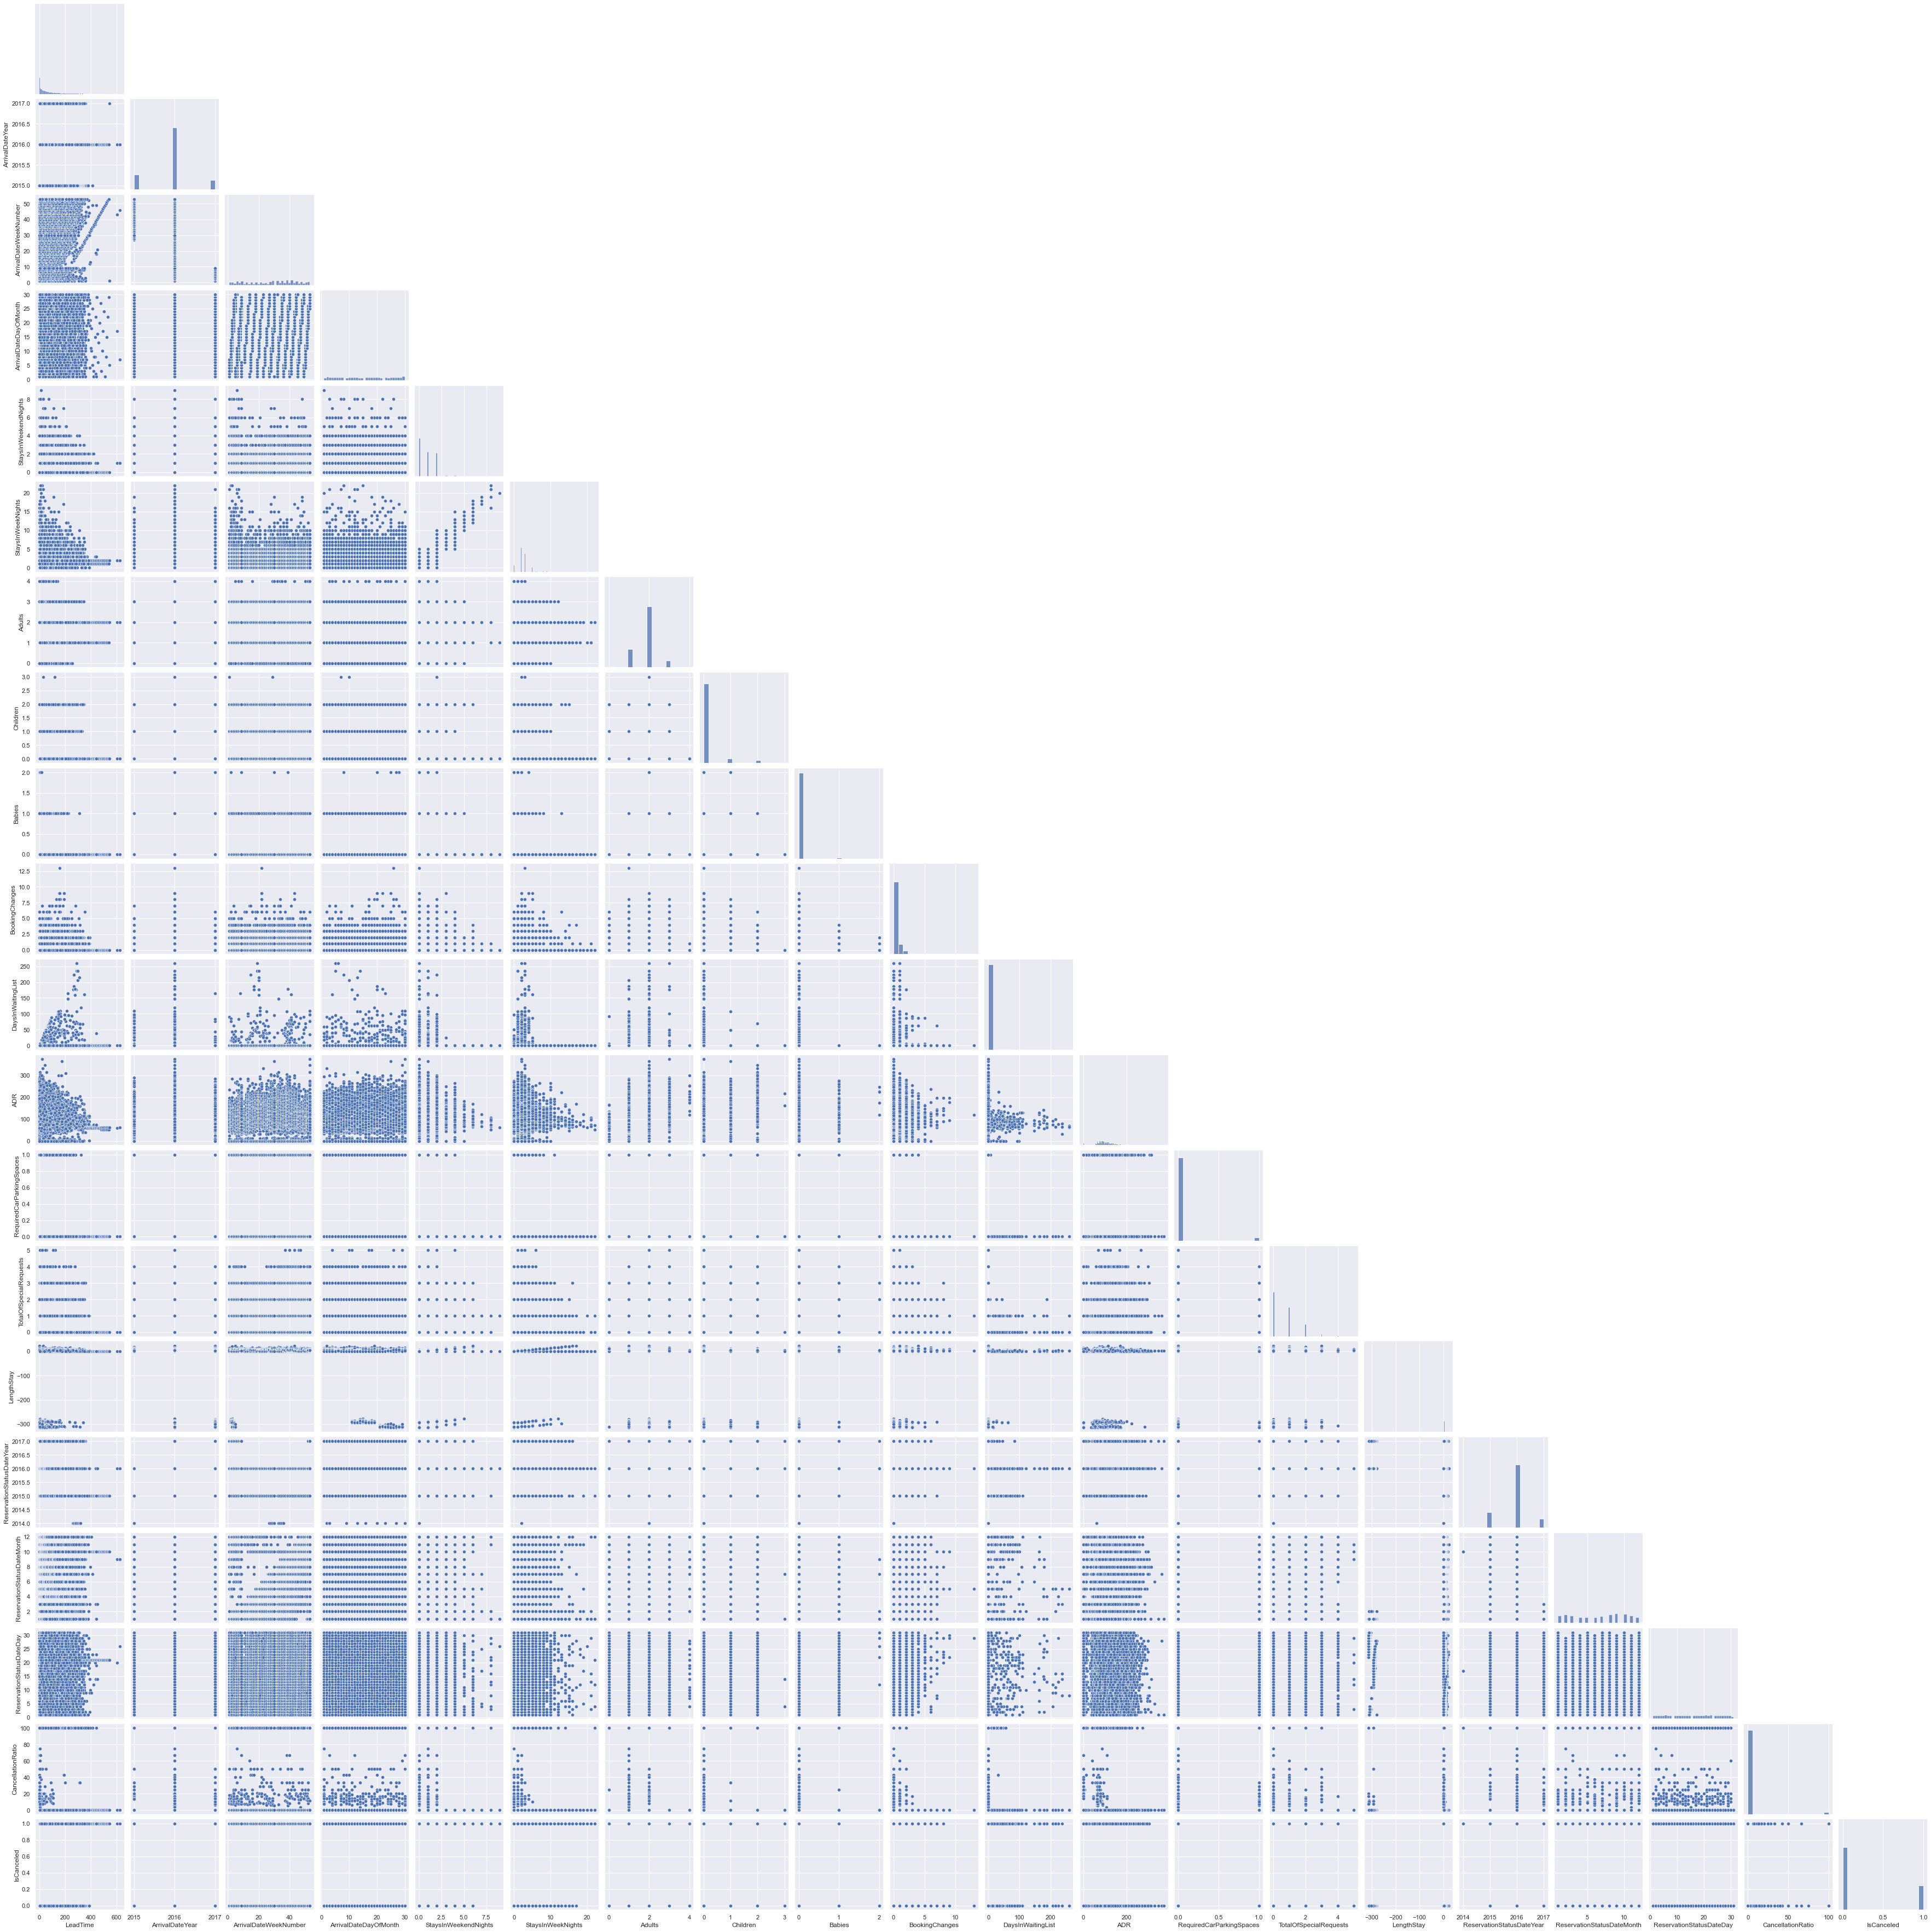

In [117]:
#non linear performance between variables - usage of the method spearmon instead of pearson
plt.figure(figsize=(10,10))

sns.pairplot(all_met, corner=True, palette='icefire')

In [118]:
# Create a function to plot the correlation between the variables named cor_heatmap()
# that should take as parameters the correlation table cor

def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    matrix = np.triu(cor)
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.YlGnBu, fmt='.1', mask = matrix)
    plt.show()

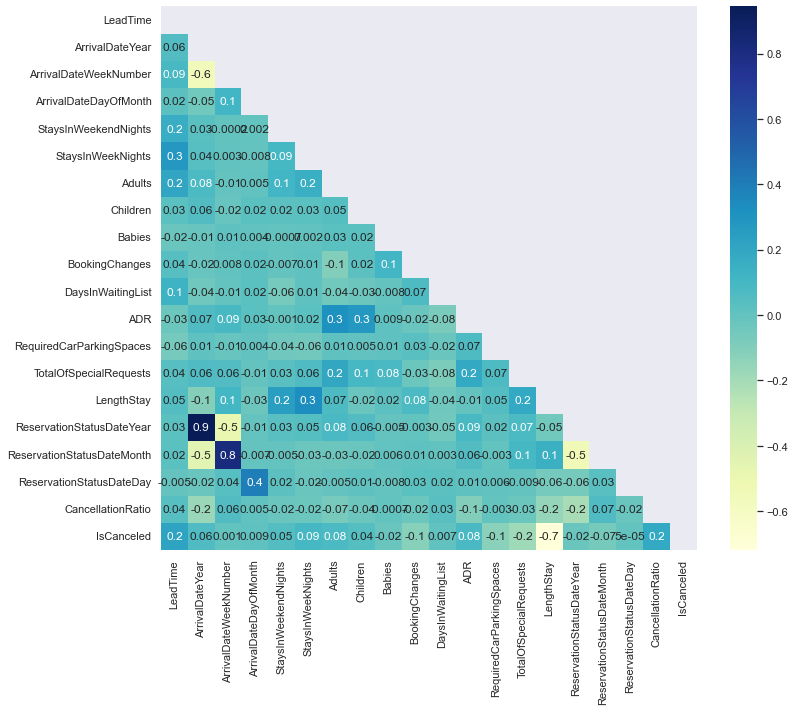

In [119]:
# analysing the histograms above the variables don't follow a normal distribution
# so we are going to use the spearman method for the correlation

cor_spearman = all_met.corr(method ='spearman')
cor_heatmap(cor_spearman)

LenghtStay has a high correlation with the target (IsCanceled).
ArrivalDateMonth has a correlation of 1 with ArrivalDateWeekNumber.
ReservationStatusDateMonth has a really high correlation (0.9) with two variables (ArrivalDateWeekNumber and ArrivalDateMonth).
ReservationStatusDateYear has a correlation of 0.9 with ArrivalDateYear.

<hr>
<a class="anchor" id="infogain">
    
### 5.1.3. Information Gain
    
</a>

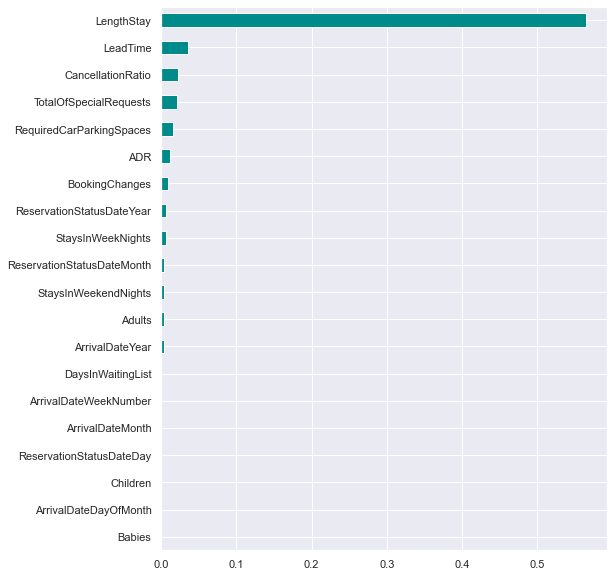

In [120]:
# threshold value of 0.05

importances = mutual_info_classif(X_train_met_scaled, y_train)
feat_importances = pd.Series(importances, X_train_met_scaled.columns[0:len(X_train_met_scaled.columns)]).sort_values()
plt.figure(figsize=(8,10))
feat_importances.plot(kind='barh', color='darkcyan')
plt.show()

<hr>
<a class="anchor" id="chi-square">
    
### 5.1.4. Chi-Square for categorical data
    
</a>

In [121]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [122]:
for var in X_train_nonmet:
    TestIndependence(X_train_nonmet[var], y_train, var)

Meal is IMPORTANT for Prediction
MarketSegment is IMPORTANT for Prediction
DistributionChannel is IMPORTANT for Prediction
ReservedRoomType is IMPORTANT for Prediction
AssignedRoomType is IMPORTANT for Prediction
DepositType is IMPORTANT for Prediction
CustomerType is IMPORTANT for Prediction
ReservationStatus is IMPORTANT for Prediction
IsRepeatedGuest is IMPORTANT for Prediction
Continent is IMPORTANT for Prediction
DirectPayment is NOT an important predictor. (Discard DirectPayment from model)
ArrivalDateSeason is IMPORTANT for Prediction


<hr>
<a class="anchor" id="wrapper">
    
## 5.2. Wrapper Methods
    
</a>

 <hr>
<a class="anchor" id="ffs">
    
### 5.2.1. Sequential Feature Selection
    
</a>

### Forward

In [123]:
lr = LogisticRegression(random_state = 93)

ffs = SequentialFeatureSelector(lr, n_jobs=-1)
ffs.fit(X_train_met_scaled, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=93),
                          n_jobs=-1)

In [124]:
ffs.support_
selected_features = pd.Series(ffs.support_, index = X_train_met_scaled.columns)
selected_features

LeadTime                       True
ArrivalDateYear               False
ArrivalDateWeekNumber         False
ArrivalDateDayOfMonth         False
StaysInWeekendNights          False
StaysInWeekNights              True
Adults                        False
Children                       True
Babies                        False
BookingChanges                 True
DaysInWaitingList             False
ADR                            True
RequiredCarParkingSpaces       True
TotalOfSpecialRequests         True
ArrivalDateMonth              False
LengthStay                     True
ReservationStatusDateYear     False
ReservationStatusDateMonth     True
ReservationStatusDateDay      False
CancellationRatio              True
dtype: bool

### Backward

In [125]:
bfs = SequentialFeatureSelector(lr, direction='backward', n_jobs=-1)
bfs.fit(X_train_met_scaled, y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=LogisticRegression(random_state=93),
                          n_jobs=-1)

In [126]:
bfs.support_
selected_features = pd.Series(bfs.support_, index = X_train_met_scaled.columns)
selected_features

LeadTime                      False
ArrivalDateYear                True
ArrivalDateWeekNumber         False
ArrivalDateDayOfMonth          True
StaysInWeekendNights          False
StaysInWeekNights              True
Adults                        False
Children                      False
Babies                        False
BookingChanges                 True
DaysInWaitingList             False
ADR                           False
RequiredCarParkingSpaces       True
TotalOfSpecialRequests         True
ArrivalDateMonth               True
LengthStay                    False
ReservationStatusDateYear      True
ReservationStatusDateMonth     True
ReservationStatusDateDay       True
CancellationRatio             False
dtype: bool

<hr>
<a class="anchor" id="rfe">
    
### 5.2.2. RFE
    
</a>

### Logistic Model

In [127]:
#no of features
nof_list=np.arange(1,21)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    
    
    model = LogisticRegression(random_state = 93)
    rfe = RFE(model, step = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_met_scaled, y_train)
    X_val_rfe = rfe.transform(X_val_met_scaled)
    
    
    
    model.fit(X_train_rfe, y_train)
    
    score = model.score(X_val_rfe, y_val)
    score_list.append(score)
    
    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 0.703655


In [128]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 2)
X_rfe = rfe.fit_transform(X = X_train_met_scaled, y = y_train)

In [129]:
rfe.support_
selected_features = pd.Series(rfe.support_, index = X_train_met_scaled.columns)
selected_features

LeadTime                      False
ArrivalDateYear                True
ArrivalDateWeekNumber         False
ArrivalDateDayOfMonth         False
StaysInWeekendNights          False
StaysInWeekNights             False
Adults                        False
Children                      False
Babies                        False
BookingChanges                False
DaysInWaitingList             False
ADR                           False
RequiredCarParkingSpaces      False
TotalOfSpecialRequests        False
ArrivalDateMonth              False
LengthStay                    False
ReservationStatusDateYear      True
ReservationStatusDateMonth    False
ReservationStatusDateDay      False
CancellationRatio             False
dtype: bool

### Random Forest

In [130]:
model = RandomForestClassifier(random_state = 93)

#no of features
nof_list=np.arange(1,21)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    rfe = RFE(estimator=model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_met_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_met_scaled)
    model.fit(X_train_rfe, y_train)
    
    score = model.score(X_val_rfe, y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.645964


In [131]:
model = RandomForestClassifier()
rfe = RFE(estimator = model, n_features_to_select = 1)
X_rfe = rfe.fit_transform(X = X_train_met_scaled, y = y_train)

In [132]:
rfe.support_
selected_features = pd.Series(rfe.support_, index = X_train_met_scaled.columns)
selected_features

LeadTime                      False
ArrivalDateYear               False
ArrivalDateWeekNumber         False
ArrivalDateDayOfMonth         False
StaysInWeekendNights          False
StaysInWeekNights             False
Adults                        False
Children                      False
Babies                        False
BookingChanges                False
DaysInWaitingList             False
ADR                           False
RequiredCarParkingSpaces      False
TotalOfSpecialRequests        False
ArrivalDateMonth              False
LengthStay                     True
ReservationStatusDateYear     False
ReservationStatusDateMonth    False
ReservationStatusDateDay      False
CancellationRatio             False
dtype: bool

<hr>
<a class="anchor" id="embedded">
    
## 5.3. Embedded Methods
    
</a>

<hr>
<a class="anchor" id="lasso">
    
### 5.3.1. Lasso Regression
    
</a>

In [133]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh", color='darkcyan')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [134]:
reg = LassoCV()
reg.fit(X_train_met_scaled, y_train)

LassoCV()

In [135]:
coef = pd.Series(reg.coef_, index = X_train_met_scaled.columns)
coef

LeadTime                     -0.315272
ArrivalDateYear               4.238706
ArrivalDateWeekNumber         0.876502
ArrivalDateDayOfMonth         0.100968
StaysInWeekendNights          0.123934
StaysInWeekNights             0.445070
Adults                        0.086172
Children                      0.031265
Babies                       -0.000000
BookingChanges               -0.300331
DaysInWaitingList             0.000000
ADR                           0.332108
RequiredCarParkingSpaces     -0.187811
TotalOfSpecialRequests       -0.284493
ArrivalDateMonth              1.011858
LengthStay                    0.195422
ReservationStatusDateYear    -6.193167
ReservationStatusDateMonth   -1.836215
ReservationStatusDateDay     -0.145586
CancellationRatio             0.467879
dtype: float64

In [136]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 18 variables and eliminated the other 2 variables


In [137]:
coef.sort_values()

ReservationStatusDateYear    -6.193167
ReservationStatusDateMonth   -1.836215
LeadTime                     -0.315272
BookingChanges               -0.300331
TotalOfSpecialRequests       -0.284493
RequiredCarParkingSpaces     -0.187811
ReservationStatusDateDay     -0.145586
Babies                       -0.000000
DaysInWaitingList             0.000000
Children                      0.031265
Adults                        0.086172
ArrivalDateDayOfMonth         0.100968
StaysInWeekendNights          0.123934
LengthStay                    0.195422
ADR                           0.332108
StaysInWeekNights             0.445070
CancellationRatio             0.467879
ArrivalDateWeekNumber         0.876502
ArrivalDateMonth              1.011858
ArrivalDateYear               4.238706
dtype: float64

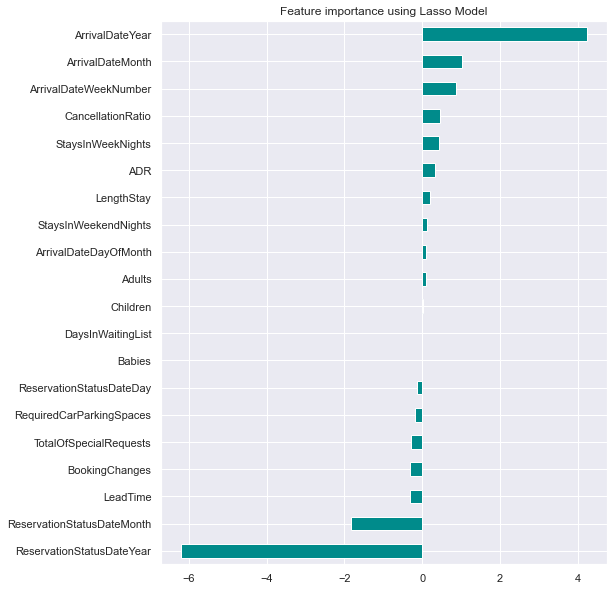

In [138]:
plot_importance(coef,'Lasso')

<hr>
<a class="anchor" id="ridge">
    
### 5.3.2. Ridge Regression
    
</a>

In [139]:
ridge = RidgeCV()

In [140]:
ridge.fit(X =X_train_met_scaled, y = y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [141]:
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)

Best alpha using built-in RidgeCV: 0.100000


In [142]:
print("Best score using built-in RidgeCV: %f" %ridge.score(X_train_met_scaled, y_train))

Best score using built-in RidgeCV: 0.391573


In [143]:
coef_ridge = pd.Series(ridge.coef_, index = X_train_met_scaled.columns)
coef_ridge.sort_values()

ReservationStatusDateYear    -6.841029
ReservationStatusDateMonth   -2.023764
LeadTime                     -0.447529
BookingChanges               -0.372972
TotalOfSpecialRequests       -0.276178
ArrivalDateWeekNumber        -0.232621
RequiredCarParkingSpaces     -0.188525
ReservationStatusDateDay     -0.168391
Babies                       -0.039244
Children                      0.035489
Adults                        0.089296
DaysInWaitingList             0.144600
StaysInWeekendNights          0.161146
LengthStay                    0.205563
ArrivalDateDayOfMonth         0.214883
ADR                           0.345339
CancellationRatio             0.459795
StaysInWeekNights             0.494117
ArrivalDateMonth              2.233525
ArrivalDateYear               4.672943
dtype: float64

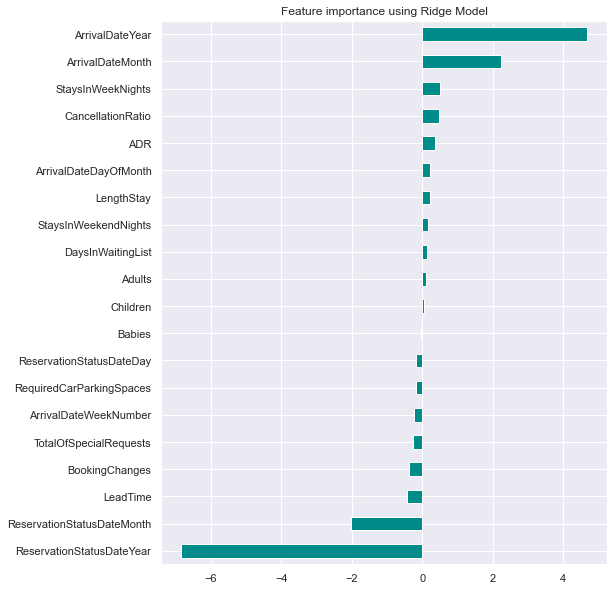

In [144]:
plot_importance(coef_ridge,'Ridge')

<hr>
<a class="anchor" id="tree">
    
### 5.3.3. Tree based Classifiers
    
</a>

[0.03185177 0.02157284 0.04601441 0.02618481 0.01873791 0.03731661
 0.00819147 0.00369455 0.00057228 0.00737215 0.00116789 0.0184047
 0.01247009 0.0290328  0.0416132  0.52739992 0.0158224  0.073415
 0.03547922 0.04368596]


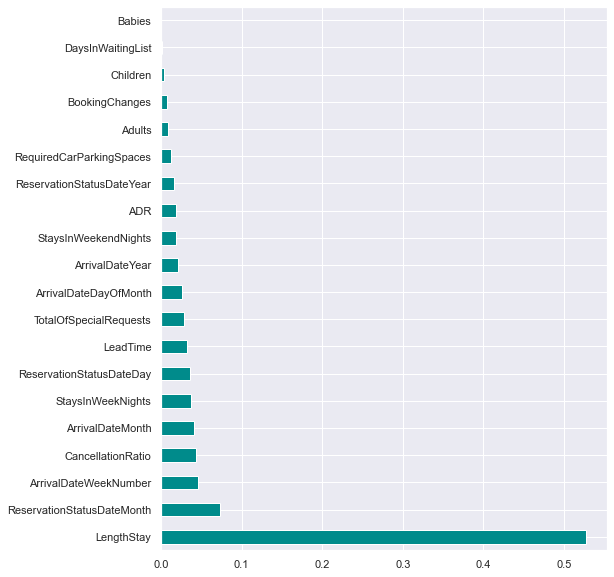

In [145]:
model = ExtraTreesClassifier()
model.fit(X_train_met, y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train_met.columns)
plt.figure(figsize=(8,10))
feat_importances.nlargest(20).plot(kind='barh', color = 'darkcyan')
plt.show()


<hr>
<a class="anchor" id="adaboostfeat">
    
### 5.3.4. AdaBoost Feature Importances
    
</a>


In [146]:
ab = AdaBoostClassifier(random_state = 93).fit(X_train_met, y_train)

<AxesSubplot:xlabel='importances', ylabel='features'>

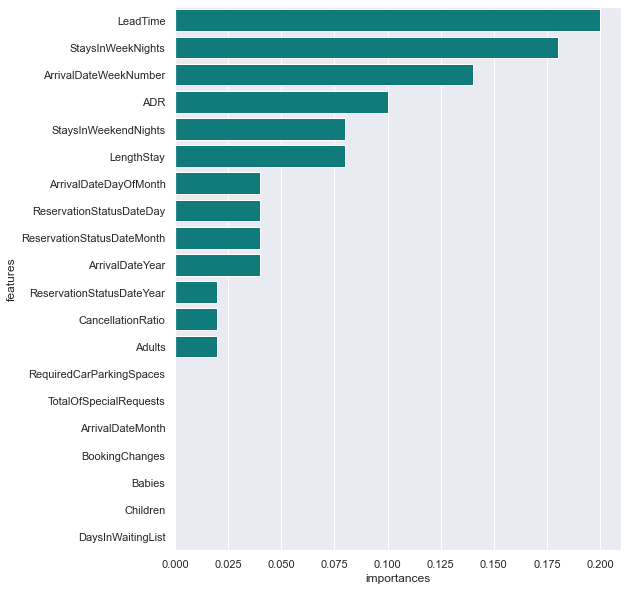

In [147]:
plt.figure(figsize=(8,10))
importances = ab.feature_importances_
features = X_train_met.columns
data_tuples = list(zip(importances, features))
data_1 = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data_1 = data_1.sort_values('importances', ascending = False)
sns.barplot(data_1['importances'], data_1['features'], color='darkcyan', orient = 'h')


## Final Insights:
    


### Numerical Data

<hr>

| Predictor | Variance | Spearman | Information Gain | Sequential (foward) | Sequential (backaward) | RFE (lr) | RFE (rf) | Lasso | Ridge | Tree based | AdaBoost | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| LeadTime | Keep | Discard | Discard | Keep | Discard | Discard | Discard | Keep | Keep | Keep | Keep | Try with and without |
| ArrivalDateYear | Keep | Discard | Discard | Discard | Keep | Keep | Discard | Keep | Keep | Keep? | Discard | Try with and without |
| ArrivalDateWeekNumber | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Keep | Keep | Keep | Keep | Try with and without |
| ArrivalDateDayOfMonth | Keep | Discard | Discard | Discard | Keep | Discard | Discard | Discard | Keep | Keep? | Keep? | Try with and without |
| StaysInWeekendNights | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Keep? | Keep | Discard |
| StaysInWeekNights | Discard | Discard | Discard | Keep | Keep | Discard | Discard | Keep | Keep | Keep | Keep | Try with and without |
| Adults | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard |
| Children | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard |
| Babies | Discard | Discard | Discard | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard |
| BookingChanges | Discard | Discard | Discard | Keep | Keep | Discard | Discard | Keep? | Keep | Discard | Discard | Discard |
| DaysInWaitingList | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard |
| ADR | Keep | Discard | Discard | Keep | Discard | Discard | Discard | Keep | Keep? | Keep? | Keep | Try with and without |
| RequiredCarParkingSpaces | Keep | Discard | Discard | Keep | Keep | Discard | Discard | Keep? | Keep? | Keep? | Discard | Try with and without |
| TotalOfSpecialRequests | Keep | Discard | Discard | Keep | Keep | Discard | Discard | Keep? | Keep? | Keep | Discard | Try with and without |
| ArrivalDateMonth | Keep | Discard | Discard | Discard | Keep | Discard | Discard | Keep | Keep | Keep | Discard | Try with and without |
| LengthStay | Keep | Keep | Keep | Keep | Discard | Discard | Keep | Keep? | Keep? | Keep | Keep? | Keep |
| ReservationStatusDateYear | Keep | Discard | Discard | Discard | Keep | Keep | Discard | Keep | Keep | Keep? | Discard |  Try with and without |
| ReservationStatusDateMonth | Keep | Discard | Discard | Keep | Keep | Discard | Discard | Keep | Keep | Keep | Discard |  Try with and without |
| ReservationStatusDateDay | Keep | Discard | Discard | Discard | Keep | Discard | Discard | Keep? | Keep? | Keep | Discard | Try with and without |
| CancellationRatio | Keep | Discard | Discard | Keep | Discard | Discard | Discard | Keep | Keep | Keep | Discard |  Try with and without |

<hr>


### Categorical Data

| Predictor | Chi-Square |
| --- | --- |
| Meal | Keep |
| MarketSegment | Keep |
| DistributionChannel | Keep |
| ReservedRoomType | Keep |
| AssignedRoomType | Keep |
| DepositType | Keep |
| CustomerType | Keep |
| ReservationStatus | Keep |
| IsRepeatedGuest | Keep |
| Continent | Keep |
| DirectPayment | Discard |
| ArrivalDateSeason | Keep |

<hr>

In [148]:
# maybe we don't need to keep both year variables

round(100 * h2[h2['ReservationStatusDateYear'] != h2['ArrivalDateYear']].shape[0] / h2.shape[0], 2)

3.87

In [149]:
# drop variables that are discarded in a first analysis and ReservationStatusDateYear

h2.drop(['StaysInWeekendNights', 'Adults', 'Children', 'Babies', 'BookingChanges', 'DaysInWaitingList', 'ReservationStatusDateYear', 'DirectPayment'], axis=1, inplace=True)

for i in ['StaysInWeekendNights', 'Adults', 'Children', 'Babies', 'BookingChanges', 'DaysInWaitingList', 'ReservationStatusDateYear']:
    metric_features.remove(i)
    
non_metric_features.remove('DirectPayment')

In [150]:
# ReservationStatus influences the model to the point to get very prediction right
# Since the hotel don't have this information before hand this variable needs to be droped

h2.drop('ReservationStatus', axis = 1, inplace = True)
    
non_metric_features.remove('ReservationStatus')

<hr>
<a class="anchor" id="ohe">
    
# 6. One Hot Encoder
    
</a>

In [151]:
# transform categorical variables into dummies in the dataset
df_ohc = h2.copy()

ohc = OneHotEncoder(sparse=False, drop='first')
ohc_feat = ohc.fit_transform(df_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names) 

df_ohc = pd.concat([df_ohc.drop(columns=non_metric_features), ohc_df], axis=1)

df_ohc.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
3               1        92             2015                7   
2               1        65             2015                7   
1               1        88             2015                7   
34939           1       181             2015                7   
34940           1       181             2015                7   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekNights  ADR  \
3                         27                      1                  4   76   
2                         27                      1                  4   68   
1                         27                      1                  4   76   
34939                     27                      1                  4   76   
34940                     27                      1                  2   76   

       RequiredCarParkingSpaces  TotalOfSpecialRequests  ...  x6_Transient  \
3                             0                       2  ...           1.0   
2                             0                       1  ...           1.0   
1                             0                       1  ...           1.0   
34939                         0                       0  ...           1.0   
34940                         0                       3  ...           0.0   

       x6_Transient-Party  x7_1  x8_Americas  x8_Asia  x8_Europe  x8_Oceania  \
3                     0.0   0.0          0.0      0.0        1.0         0.0   
2                     0.0   0.0          0.0      0.0        1.0         0.0   
1                     0.0   0.0          0.0      0.0        1.0         0.0   
34939                 0.0   0.0          0.0      0.0        1.0         0.0   
34940                 1.0   0.0          0.0      0.0        1.0         0.0   

       x9_Spring  x9_Summer  x9_Winter  
3            0.0        1.0        0.0  
2            0.0        1.0        0.0  
1            0.0        1.0        0.0  
34939        0.0        1.0        0.0  
34940        0.0        1.0        0.0  

[5 rows x 49 columns]

<hr>
<a class="anchor" id="model">
    
# 7. Modelling
    
</a>

<hr>
<a class="anchor" id="partition">
    
## 7.1. Data Partition
    
</a>

In [152]:
h2 = df_ohc.copy()

# Define X matrix and target (y)
X = h2.drop('IsCanceled', axis = 1)
y = h2['IsCanceled']

<hr>
<a class="anchor" id="scaling">
    
## 7.2. Data Scaling
    
</a>

### MinMax Scaler

In [153]:
min_max = MinMaxScaler().fit(X[metric_features])

min_max_X = pd.concat([pd.DataFrame(min_max.transform(X[metric_features]), columns = X[metric_features].columns, index = X.index), pd.DataFrame(X[list(X.drop(metric_features, axis = 1).columns.values)], columns = X[list(X.drop(metric_features, axis = 1).columns.values)].columns, index = X.index)], axis = 1)


### Standard Scaler

In [154]:
std_scaler = StandardScaler().fit(X[metric_features])

std_scaler_X = pd.concat([pd.DataFrame(std_scaler.transform(X[metric_features]), columns = X[metric_features].columns, index = X.index), pd.DataFrame(X[list(X.drop(metric_features, axis = 1).columns.values)], columns = X[list(X.drop(metric_features, axis = 1).columns.values)].columns, index = X.index)], axis = 1)


### Robust Scaler

In [155]:
robust = RobustScaler().fit(X[metric_features])

robust_X = pd.concat([pd.DataFrame(robust.transform(X[metric_features]), columns = X[metric_features].columns, index = X.index), pd.DataFrame(X[list(X.drop(metric_features, axis = 1).columns.values)], columns = X[list(X.drop(metric_features, axis = 1).columns.values)].columns, index = X.index)], axis = 1)


<hr>
<a class="anchor" id="models">
    
## 7.3. Models
    
</a>

In [156]:
# function named as evaluate_model that receives as parameters the independent variables, 
# the dependent variable and the model and returns the f1 score method result

def evaluate_model(X,y, model):
    predictions = model.predict(X)  # f1_score(y, model.fit_predict(X))
    return f1_score(y, predictions)

In [157]:
# since we are dealing with a dataset dependent on time we will use TimeSeriesSplit
# to cross validate our results

splitter = TimeSeriesSplit(n_splits = 10)

In [158]:
# this function will averaged the train and test sets f1-score of each split

def avg_f1score(X,y, model):
    score_train = []
    score_test = []

    for train_index, test_index in splitter.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = model.fit(X_train, y_train)
        
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        
        score_train.append(value_train)
        score_test.append(value_test)
   
    print('Train:', np.mean(score_train)) 
    print('Test:', np.mean(score_test))

In [159]:
# this function will averaged the TN, FP, FN, TP of the test set in each split in order to return 
# the 'averaged' confusion matrix

def conf_matrix(X,y, model):
    TN = []
    FP = []
    FN = []
    TP = []
    
    for train_index, test_index in splitter.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = model.fit(X_train, y_train)
        
        TN.append(confusion_matrix(y_test, model.predict(X_test))[0,0])
        FP.append(confusion_matrix(y_test, model.predict(X_test))[0,1])
        FN.append(confusion_matrix(y_test, model.predict(X_test))[1,0])
        TP.append(confusion_matrix(y_test, model.predict(X_test))[1,1])
        
    return pd.DataFrame(data=([[int(np.mean(TN)), int(np.mean(FP))],[int(np.mean(FN)), int(np.mean(TP))]]),
                              index=pd.Index([0, 1], name="True"),
                              columns=pd.Index([0, 1], name="Pred"))


<hr>
<a class="anchor" id="logistic">
    
### 7.3.1. Logistic Regression
    
</a>

In [160]:
# best results when using the following features

feat = ['LeadTime',  'ArrivalDateMonth', 
        'ArrivalDateDayOfMonth', 'StaysInWeekNights',
        'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 
        'ReservationStatusDateMonth', 'CancellationRatio',
        'x0_HB', 'x0_SC', 'x1_Complementary', 'x1_Corporate', 'x1_Direct',
        'x1_Groups', 'x1_Offline TA/TO', 'x1_Online TA', 'x2_Direct', 'x2_GDS',
        'x2_TA/TO', 'x3_B', 'x3_D', 'x3_E', 'x3_F', 'x3_G', 'x4_B', 'x4_C',
        'x4_D', 'x4_E', 'x4_F', 'x4_G', 'x4_K', 'x5_NonRefund', 'x6_Group',
        'x6_Transient', 'x6_Transient-Party', 'x8_Americas', 'x8_Asia',
        'x8_Europe', 'x8_Oceania']

In [161]:
# after trying with min max, standard and robust scaler the best result was with standard

lr = LogisticRegression(random_state = 93)

avg_f1score(std_scaler_X[feat], y, lr)

Train: 0.5993687611815993
Test: 0.4839087813955687


In [162]:
# Define the params to explore

params= {'penalty':['l2', 'none'],
        'class_weight':['balanced', None],
        'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
        'C':[0.8, 0.9, 1.0, 1.2]}

In [163]:
# Instatiating GridSearch to tune the lr hyper-parameters

gscv = GridSearchCV(lr, params, cv = splitter, scoring = 'f1', refit = True, verbose = -1, n_jobs = 4) 

In [164]:
#gscv.fit(std_scaler_X[feat], y)

#gscv.best_params_

In [165]:
# best parameters for lr 

lr = LogisticRegression(penalty = 'none', class_weight = 'balanced', solver = 'saga', C = 0.8, random_state = 93)

avg_f1score(std_scaler_X[feat], y, lr)

Train: 0.6330775524545112
Test: 0.5837911177282691


In [166]:
conf_matrix(std_scaler_X[feat], y, lr)

Pred     0     1
True            
0     2165  1153
1      407  1073

<hr>
<a class="anchor" id="naive">
    
### 7.3.2. Naive Bayes
    
</a>

In [167]:
# best results when using the following features

feat = ['LeadTime', 'ArrivalDateYear', 
       'StaysInWeekNights',
       'ADR', 'TotalOfSpecialRequests',
       'ReservationStatusDateMonth', 'CancellationRatio',
       'x1_Complementary', 'x1_Corporate', 'x1_Direct',
       'x1_Groups', 'x1_Offline TA/TO', 'x1_Online TA', 'x2_Direct', 'x2_GDS',
       'x2_TA/TO', 'x4_B', 'x4_C', 'x4_D', 'x4_E', 'x4_F', 'x4_G', 'x4_K', 'x5_NonRefund', 
       'x6_Group', 'x6_Transient', 'x6_Transient-Party','x8_Americas', 'x8_Asia',
       'x8_Europe', 'x8_Oceania']

In [168]:
nb = GaussianNB()

avg_f1score(X[feat], y, nb)

Train: 0.5215328330123901
Test: 0.5159051770516325


In [169]:
conf_matrix(X[feat], y, nb)

Pred     0     1
True            
0     1636  1681
1      383  1097

<hr>
<a class="anchor" id="decision_trees">
    
### 7.3.3. Decision Trees
    
</a>

In [170]:
# best results when using the following features

feat = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekNights',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ReservationStatusDateMonth', 'CancellationRatio',
       'x0_HB', 'x0_SC', 'x1_Complementary', 'x1_Corporate', 'x1_Direct',
       'x1_Groups', 'x1_Offline TA/TO', 'x1_Online TA', 'x2_Direct', 'x2_GDS',
       'x2_TA/TO', 'x3_B', 'x3_D', 'x3_E', 'x3_F', 'x3_G', 'x4_B', 'x4_C',
       'x4_D', 'x4_E', 'x4_F', 'x4_G', 'x4_K', 'x5_NonRefund', 'x6_Group',
       'x6_Transient', 'x6_Transient-Party', 'x7_1', 'x8_Americas', 'x8_Asia',
       'x8_Europe', 'x8_Oceania', 'x9_Spring', 'x9_Summer', 'x9_Winter']

In [171]:
# big overfitting - need to tune the hyper-parameters

dt = DecisionTreeClassifier(random_state=93)

avg_f1score(X[feat], y, dt)

Train: 0.9867285888886702
Test: 0.6065173310710619


In [172]:
# Define the grid to explore
params = {
    'criterion': ['entropy', 'gini'],
    'splitter': ['random', 'best'],
    'max_depth': [3, 6, 9],
    'min_samples_split': [0.005, 0.01, 0.05],
    'max_features': [None, 'sqrt', 'auto', 'log2'],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}]
    }

In [173]:
# Instatiating GridSearch
gscv = GridSearchCV(dt, params, cv = splitter, scoring = 'f1', refit = True, verbose = -1, n_jobs = 4) 

In [174]:
#gscv.fit(X[feat], y)

#gscv.best_params_

In [175]:
# best parammeters for dt

dt = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth = 9, min_samples_split = 0.005, max_features = None, class_weight = {0: 1, 1: 2}, random_state = 93)

avg_f1score(X[feat], y, dt)

Train: 0.6779737468315339
Test: 0.5825028617967629


In [176]:
conf_matrix(X[feat], y, dt)

Pred     0    1
True           
0     2612  706
1      615  865

<hr>
<a class="anchor" id="neural">
    
### 7.3.4. MLP Classifier (Neural Networks)
    
</a>

In [177]:
# best results when using the following features

feat = ['CancellationRatio','ArrivalDateMonth', 'ArrivalDateDayOfMonth',
        'StaysInWeekNights', 'ReservationStatusDateMonth', 'x5_NonRefund', 
        'x6_Group', 'x6_Transient', 'x6_Transient-Party']

In [178]:
nn = MLPClassifier(random_state = 93)

avg_f1score(std_scaler_X[feat], y, nn)

Train: 0.8085574821077326
Test: 0.8007922326610026


In [179]:
# Define the grid to explore

params = {'hidden_layer_sizes':[(100,), (100,100,100,100)],
          'learning_rate':['constant', 'invscaling', 'adaptive'],
          'max_iter': [100, 150, 200, 300]}

#'solver': ['lbfgs', 'adam'],
#'activation': ['logistic', 'tanh', 'relu'],

In [180]:
# Instatiating GridSearch

gscv = GridSearchCV(nn, params, cv = splitter, scoring = 'f1', refit = True, verbose = -1, n_jobs = 4)

In [181]:
#gscv.fit(std_scaler_X[feat], y)

#gscv.best_params_

In [182]:
# best parameters for gscv were the default ones

nn = MLPClassifier(random_state = 93)

avg_f1score(std_scaler_X[feat], y, nn)

Train: 0.8085574821077326
Test: 0.8007922326610026


In [183]:
conf_matrix(std_scaler_X[feat], y, nn)

Pred     0     1
True            
0     3034   284
1      355  1126

<hr>
<a class="anchor" id="adaboost">
    
### 7.3.5. AdaBoost
    
</a>

In [184]:
# best results when using the following features

feat = ['LeadTime', 'ArrivalDateMonth', 'ArrivalDateYear',
        'ArrivalDateDayOfMonth', 'StaysInWeekNights',
        'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
        'CancellationRatio',
        'x1_Complementary', 'x1_Corporate', 'x1_Direct',
        'x1_Groups', 'x1_Offline TA/TO', 'x1_Online TA', 'x2_Direct', 'x2_GDS',
        'x2_TA/TO', 'x4_B', 'x4_C', 'x4_D', 'x4_E', 'x4_F', 'x4_G', 'x4_K', 'x5_NonRefund', 
        'x6_Group', 'x6_Transient', 'x6_Transient-Party', 'x9_Spring', 'x9_Summer', 'x9_Winter']

In [185]:
ab = AdaBoostClassifier(random_state = 93)

avg_f1score(X[feat], y, ab)

Train: 0.6130984602457272
Test: 0.501326439988371


In [186]:
# Define the grid to explore
params= {'learning_rate':list(np.linspace(0.1, 1, 10, endpoint=True)),
         'n_estimators':[90, 120, 130, 140]}

In [187]:
# Instatiating GridSearch
gscv = GridSearchCV(ab, params, cv = splitter, scoring = 'f1', refit = True, verbose = -1, n_jobs = 4) 

In [188]:
#gscv.fit(X[feat], y)

#gscv.best_params_

In [189]:
# best parammeters for ab

ab = AdaBoostClassifier(n_estimators = 130, random_state = 93)

avg_f1score(X[feat], y, ab)

Train: 0.6130658451870704
Test: 0.49992980688977673


In [190]:
conf_matrix(X[feat], y, ab)

Pred     0    1
True           
0     2922  395
1      831  650

<hr>
<a class="anchor" id="gradientboost">
    
### 7.3.6. Gradient Boosting
    
</a>

In [191]:
# best results when using the following features

feat = ['ArrivalDateMonth', 
        'RequiredCarParkingSpaces', 'ReservationStatusDateMonth', 
        'x5_NonRefund', 'x7_1', 'x9_Spring', 'x9_Summer', 'x9_Winter']

In [192]:
gb = GradientBoostingClassifier(random_state = 93)

avg_f1score(X[feat], y, gb)

Train: 0.7272652196949309
Test: 0.6677488447161037


In [193]:
# Define the grid to explore
params= {'learning_rate':[0.1, 0.3, 0.5, 0.6],
         'n_estimators':[80, 100, 120],
         'max_features':[0.5,'sqrt','log2',None]}

In [194]:
# Instatiating GridSearch
gscv = GridSearchCV(gb, params, cv = splitter, scoring = 'f1', refit = True, verbose = -1, n_jobs = 4) 

In [195]:
#gscv.fit(X[feat], y)

#gscv.best_params_

In [196]:
# best parammeters for gb

gb = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 100, max_features = None, random_state = 93)

avg_f1score(X[feat], y, gb)

Train: 0.7453890521778591
Test: 0.7402312673178814


In [197]:
conf_matrix(X[feat], y, gb)

Pred     0     1
True            
0     2775   543
1      384  1096

<hr>
<a class="anchor" id="randomforest">
    
### 7.3.7. Random Forest
    
</a>

In [198]:
# best results when using the following features

feat = ['ArrivalDateMonth', 'RequiredCarParkingSpaces', 
        'ReservationStatusDateMonth', 'x5_NonRefund', 
        'x6_Group', 'x6_Transient', 'x6_Transient-Party', 
        'x9_Spring', 'x9_Summer', 'x9_Winter']

In [199]:
rf = RandomForestClassifier(random_state = 93)

avg_f1score(X[feat], y, rf)

Train: 0.7455313150854211
Test: 0.7396584918519025


In [200]:
# Define the grid to explore
params= {'n_estimators':[60, 80, 100, 120],
         'criterion':['gini', 'entropy'],
         'max_features':['auto', 'sqrt', 'log2'],
         'min_samples_split':[2, 3, 4, 6, 7, 8]}

In [201]:
# Instatiating GridSearch
gscv = GridSearchCV(rf, params, cv = splitter, scoring = 'f1', refit = True, verbose = -1, n_jobs = 4) 

In [202]:
#gscv.fit(X[feat], y)

#gscv.best_params_

In [203]:
# best parammeters for rf

rf = RandomForestClassifier(criterion = 'gini', max_features = 'auto', n_estimators = 80, min_samples_split = 6, random_state = 93)

avg_f1score(X[feat], y, rf)

Train: 0.7455129973991073
Test: 0.7399633105149978


In [204]:
conf_matrix(X[feat], y, rf)

Pred     0     1
True            
0     2769   549
1      383  1098

<hr>
<a class="anchor" id="extratree">
    
### 7.3.8. Extra Trees Classifier
    
</a>

In [205]:
# best results when using the following features

feat = ['ArrivalDateMonth', 'ReservationStatusDateMonth', 
        'x5_NonRefund', 'x6_Group', 'x6_Transient', 'x6_Transient-Party', 
        'x9_Spring', 'x9_Summer', 'x9_Winter']

In [206]:
et = ExtraTreesClassifier(random_state = 93)

avg_f1score(X[feat], y, et)

Train: 0.7453962407501674
Test: 0.737888864263604


In [207]:
# Define the grid to explore
params= {'n_estimators':[80, 100, 120],
         'criterion':['gini', 'entropy'],
         'max_features':['auto', 'sqrt', 'log2'],
         'min_samples_split':[2, 4, 6],
         'bootstrap':[True, False], 
         'class_weight':[None, 'balanced', {0: 1, 1: 2}]}

In [208]:
# Instatiating GridSearch
gscv = GridSearchCV(et, params, cv = splitter, scoring = 'f1', refit = True, verbose = -1, n_jobs = 4) 

In [209]:
#gscv.fit(X[feat], y)

#gscv.best_params_

In [210]:
# best parammeters for et

et = ExtraTreesClassifier(criterion = 'gini', bootstrap = False, class_weight = None, max_features = 'auto', n_estimators = 80, min_samples_split = 6, random_state = 93)

avg_f1score(X[feat], y, et)

Train: 0.7453962407501674
Test: 0.73841627585573


In [211]:
conf_matrix(X[feat], y, et)

Pred     0     1
True            
0     2752   566
1      383  1097

<hr>
<a class="anchor" id="bagging">
    
### 7.3.9. Bagging
    
</a>

In [212]:
# bagging with default base estimator - DecisionTreeClassifier
# best results when using the following features

feat = ['ArrivalDateMonth', 'ReservationStatusDateMonth', 
        'x2_Direct', 'x2_GDS','x2_TA/TO', 
        'x3_B', 'x3_D', 'x3_E', 'x3_F', 'x3_G', 
        'x5_NonRefund', 'x9_Spring', 'x9_Summer', 'x9_Winter']

In [213]:
b = BaggingClassifier(random_state = 93)

avg_f1score(X[feat], y, b)

Train: 0.7480466350876488
Test: 0.7312306364518607


In [214]:
# Define the grid to explore

params= {'bootstrap':[True, False],
         'bootstrap_features':[True, False],
         'n_estimators':[5,10,15,20],
         'max_samples':[0.1,0.2,0.4,0.6,0.8,1.0]
         }

In [215]:
# Instatiating GridSearch
gscv = GridSearchCV(b, params, cv = splitter, scoring = 'f1', refit = True, verbose = -1, n_jobs = 4) 

In [216]:
#gscv.fit(X[feat], y)

#gscv.best_params_

In [217]:
# best parammeters for b

b = BaggingClassifier(bootstrap = True, bootstrap_features = False, n_estimators = 10, max_samples = 0.4, random_state = 93)

avg_f1score(X[feat], y, b)

Train: 0.746671068226583
Test: 0.7341820026163972


In [218]:
conf_matrix(X[feat], y, b)

Pred     0     1
True            
0     2749   569
1      390  1091

In [219]:
# bagging with base estimator - RandomForestClassifier
# same features as RandomForest above

feat = ['ArrivalDateMonth', 'RequiredCarParkingSpaces', 
        'ReservationStatusDateMonth', 'x5_NonRefund', 
        'x6_Group', 'x6_Transient', 'x6_Transient-Party', 
        'x9_Spring', 'x9_Summer', 'x9_Winter']

In [220]:
rf = RandomForestClassifier(criterion = 'gini', max_features = 'auto', min_samples_split = 6, random_state = 93)

b_rf = BaggingClassifier(base_estimator = rf, random_state = 93)

avg_f1score(X[feat], y, b_rf)

Train: 0.7450991799978759
Test: 0.7396309205770837


In [221]:
# Instatiating GridSearch

gscv = GridSearchCV(b_rf, params, cv = splitter, scoring = 'f1', refit = True, verbose = -1, n_jobs = 4) 

In [222]:
#gscv.fit(X[feat], y)

#gscv.best_params_

In [223]:
# best parammeters for b_rf

b_rf = BaggingClassifier(base_estimator = rf, bootstrap = True, bootstrap_features = False, max_samples = 1.0, n_estimators = 5, random_state = 93)

avg_f1score(X[feat], y, b_rf)

Train: 0.7451002135106568
Test: 0.740096628119657


In [224]:
conf_matrix(X[feat], y, b_rf)

Pred     0     1
True            
0     2768   549
1      383  1098

In [225]:
# bagging with base estimator - MLPClassifier
# same features as RandomForest above

feat = ['LeadTime', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth',
        'StaysInWeekNights', 'ReservationStatusDateMonth', 'x5_NonRefund', 
        'x6_Group', 'x6_Transient', 'x6_Transient-Party', 'x7_1',
        'x8_Americas', 'x8_Asia', 'x8_Europe', 'x8_Oceania']

In [226]:
nn = MLPClassifier(max_iter = 150, random_state = 93)

b_nn = BaggingClassifier(base_estimator = nn, random_state = 93)

avg_f1score(std_scaler_X[feat], y, b_nn)

Train: 0.7927715797995212
Test: 0.7930563112477738


In [227]:
conf_matrix(std_scaler_X[feat], y, b_nn)

Pred     0     1
True            
0     3031   286
1      359  1121

<hr>
<a class="anchor" id="stacking">
    
### 7.3.10. Stacking
    
</a>

In [228]:
# best results when using the following features

feat = ['CancellationRatio','ArrivalDateMonth', 'ArrivalDateDayOfMonth',
        'StaysInWeekNights', 'ReservationStatusDateMonth', 'x5_NonRefund', 
        'x6_Group', 'x6_Transient', 'x6_Transient-Party']

In [229]:
# stacking using RandomForestClassifier and MLPClassifier with the parameters setted above

estimators = [('rf', RandomForestClassifier(n_estimators = 80, min_samples_split = 6, random_state = 93)),
              ('nn', MLPClassifier(max_iter = 150, random_state = 93))]


final_model = StackingClassifier(estimators=estimators)
avg_f1score(std_scaler_X[feat], y, final_model)

Train: 0.7859934503514225
Test: 0.7854405372268018


In [230]:
# stacking using RandomForestClassifier and MLPClassifier with the default parameters 

estimators = [('rf', RandomForestClassifier(random_state = 93)),
              ('nn', MLPClassifier(random_state = 93))]


final_model = StackingClassifier(estimators=estimators)
avg_f1score(std_scaler_X[feat], y, final_model)

Train: 0.785505752270631
Test: 0.7888463285062943


In [231]:
# stacking using GradientBoostingClassifier and MLPClassifier

estimators = [('gb', GradientBoostingClassifier(random_state = 93)),
              ('nn', MLPClassifier(random_state = 93))]


final_model = StackingClassifier(estimators=estimators)
avg_f1score(std_scaler_X[feat], y, final_model)

Train: 0.8060291668662607
Test: 0.7909910943368252


In [232]:
conf_matrix(std_scaler_X[feat], y, final_model)

Pred     0     1
True            
0     3006   311
1      357  1123

<hr>
<a class="anchor" id="best_model">
    
## 7.4. Best Model
    
</a>

In [233]:
# the model that gave the best results was MLPClassifier

feat = ['CancellationRatio','ArrivalDateMonth', 'ArrivalDateDayOfMonth',
        'StaysInWeekNights', 'ReservationStatusDateMonth', 'x5_NonRefund', 
        'x6_Group', 'x6_Transient', 'x6_Transient-Party']

nn = MLPClassifier(random_state = 93)

avg_f1score(std_scaler_X[feat], y, nn)

Train: 0.8085574821077326
Test: 0.8007922326610026


In [234]:
conf_matrix(std_scaler_X[feat], y, nn)

Pred     0     1
True            
0     3034   284
1      355  1126